<a href="https://colab.research.google.com/github/Ajinkya-dak/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [605]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [606]:
#All Machine learning Models are imported here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [607]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [608]:
#path to given CSV file 
path = "/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

In [609]:
Net_df = pd.read_csv(path)

In [610]:
#Column names in Dataframe 
Net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [611]:
#top 5 
Net_df.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [612]:
#tail of data
Net_df.tail(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7757,s7758,Movie,Zach Galifianakis: Live at the Purple Onion,Michael Blieden,"Zach Galifianakis, Brian Unger",United States,"February 26, 2019",2006,TV-MA,61 min,Stand-Up Comedy,"The unorthodox, piano-playing stand-up star Za..."
7758,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,"October 1, 2018",2008,R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...
7759,s7760,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
7760,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...
7761,s7762,Movie,Zapped,Peter DeLuise,"Zendaya, Chanelle Peloso, Spencer Boldman, Emi...","Canada, United States","February 1, 2017",2014,TV-Y,92 min,"Children & Family Movies, Comedies",A girl discovers a dog-training app that can g...
7762,s7763,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
7763,s7764,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7766,s7767,TV Show,Zig & Sharko,NaN,NaN,France,"December 1, 2017",2016,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t..."


In [613]:
Net_df.shape

(7787, 12)

Shape of our dataset is (7787,11) that means we have 7787 number of rows and 11 columns

In [614]:
#Renaming Listed_in column to genre for ease of understanding 
Net_df.rename(columns = {"listed_in":"genres"},inplace = True)
Net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [615]:
#basic info
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [616]:
Net_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [617]:
#checking unique values of each features
Net_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
genres           492
description     7769
dtype: int64

In [618]:
Net_df.duplicated().sum()

0

In [619]:
# Droping (show_id) column as it has no use in our Analysis
Net_df = Net_df.drop(['show_id'], axis =1)

In [620]:
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   genres        7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


# **Handling Null Values**

In [621]:
Net_df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

There are quite alot of null values in the dataset. There are a total of 3,631 null values across the entire dataset,which is half the number of total dataset column. we cant just drop the columns containing null values.


In [622]:
# Null value hadling
Net_df['director'].fillna('Unknown', inplace=True)
Net_df['cast'].fillna('Unknown', inplace=True)
Net_df['country'].fillna('Unknown', inplace=True)
Net_df.dropna(subset=['date_added','rating'],inplace=True)

since the null values for data_added and rating is only 10 and 7 rspectively, we drop this columns from our original dataset. 

In [623]:
Net_df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

Now that we have dealt with all the null values.

In [624]:
import datetime as dt
Net_df["date_added"] = pd.to_datetime(Net_df['date_added'])

# Year_added
Net_df['year_added'] = Net_df['date_added'].dt.year

#Adding month column from 'date_added'
Net_df['month_added']=Net_df['date_added'].dt.month


# Droping the month_added columns
Net_df.drop(['date_added'],axis=1,inplace=True)

In [625]:
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7770 non-null   object
 1   title         7770 non-null   object
 2   director      7770 non-null   object
 3   cast          7770 non-null   object
 4   country       7770 non-null   object
 5   release_year  7770 non-null   int64 
 6   rating        7770 non-null   object
 7   duration      7770 non-null   object
 8   genres        7770 non-null   object
 9   description   7770 non-null   object
 10  year_added    7770 non-null   int64 
 11  month_added   7770 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 789.1+ KB


# **EDA**

# **TYPE**

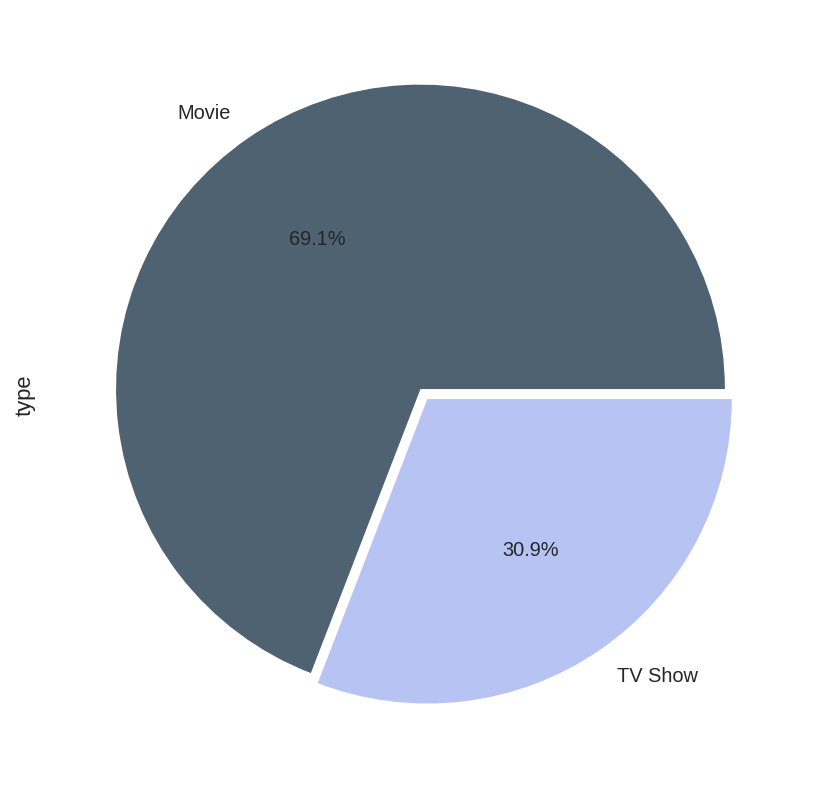

In [626]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
Net_df['type'].value_counts().plot.pie( autopct = '%.1f%%',explode = [0.02,0.02],colors = colors, figsize=(15,7))

# **Title**

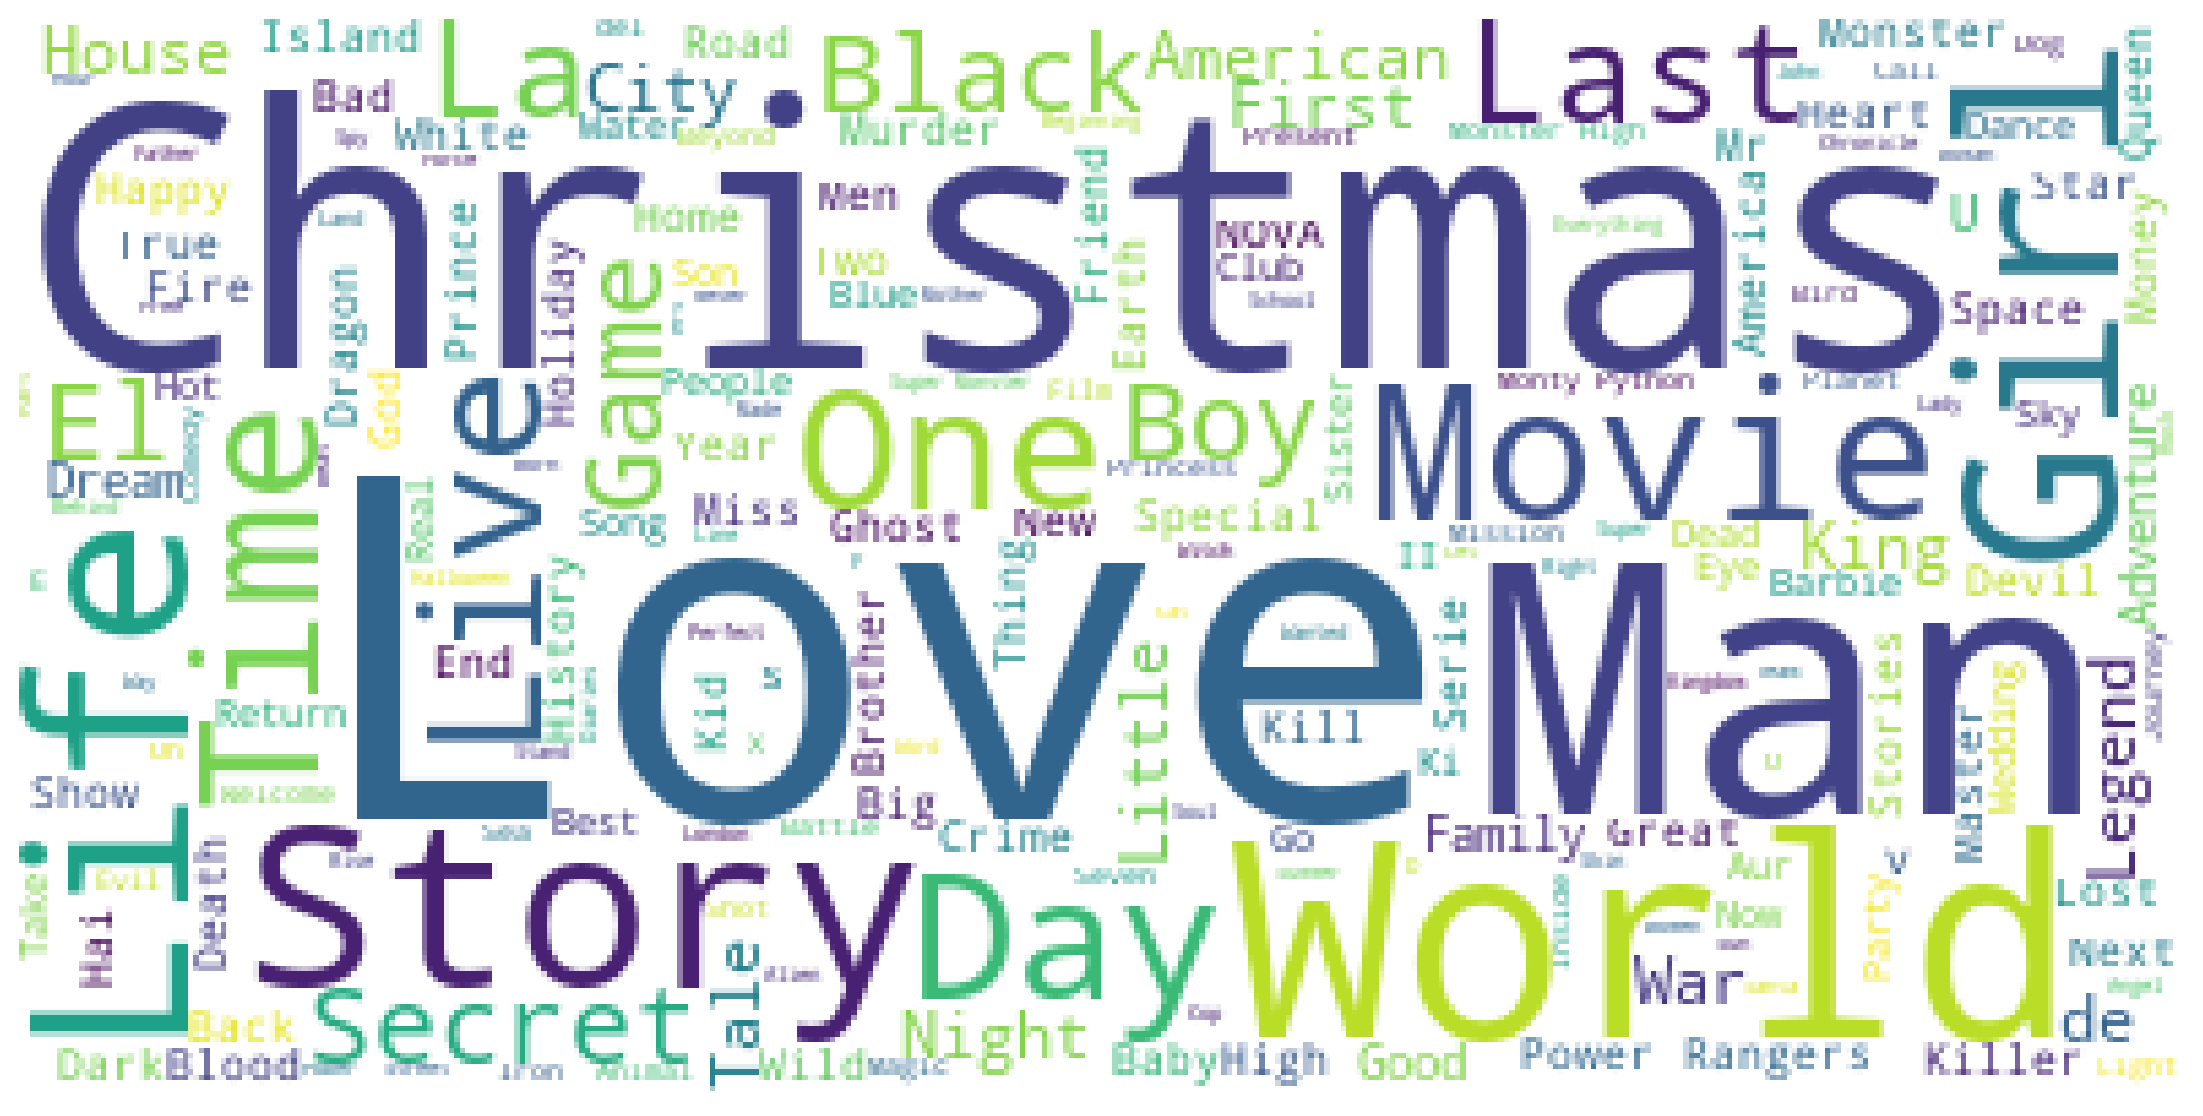

In [627]:
from wordcloud import WordCloud, STOPWORDS
#Most occurred word in title
plt.subplots(figsize=(20,10))
stopwords = set(STOPWORDS)
text = " ".join(Net_df.title)
wordcloud = WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **DIRECTOR**

In [628]:
Net_df["director"].nunique()

4048

In [629]:
Net_df["director"].value_counts()

Unknown                   2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Charles Officer              1
John Trengove                1
Jonathan Helpert             1
Jacob Schwab                 1
Sam Dunn                     1
Name: director, Length: 4048, dtype: int64

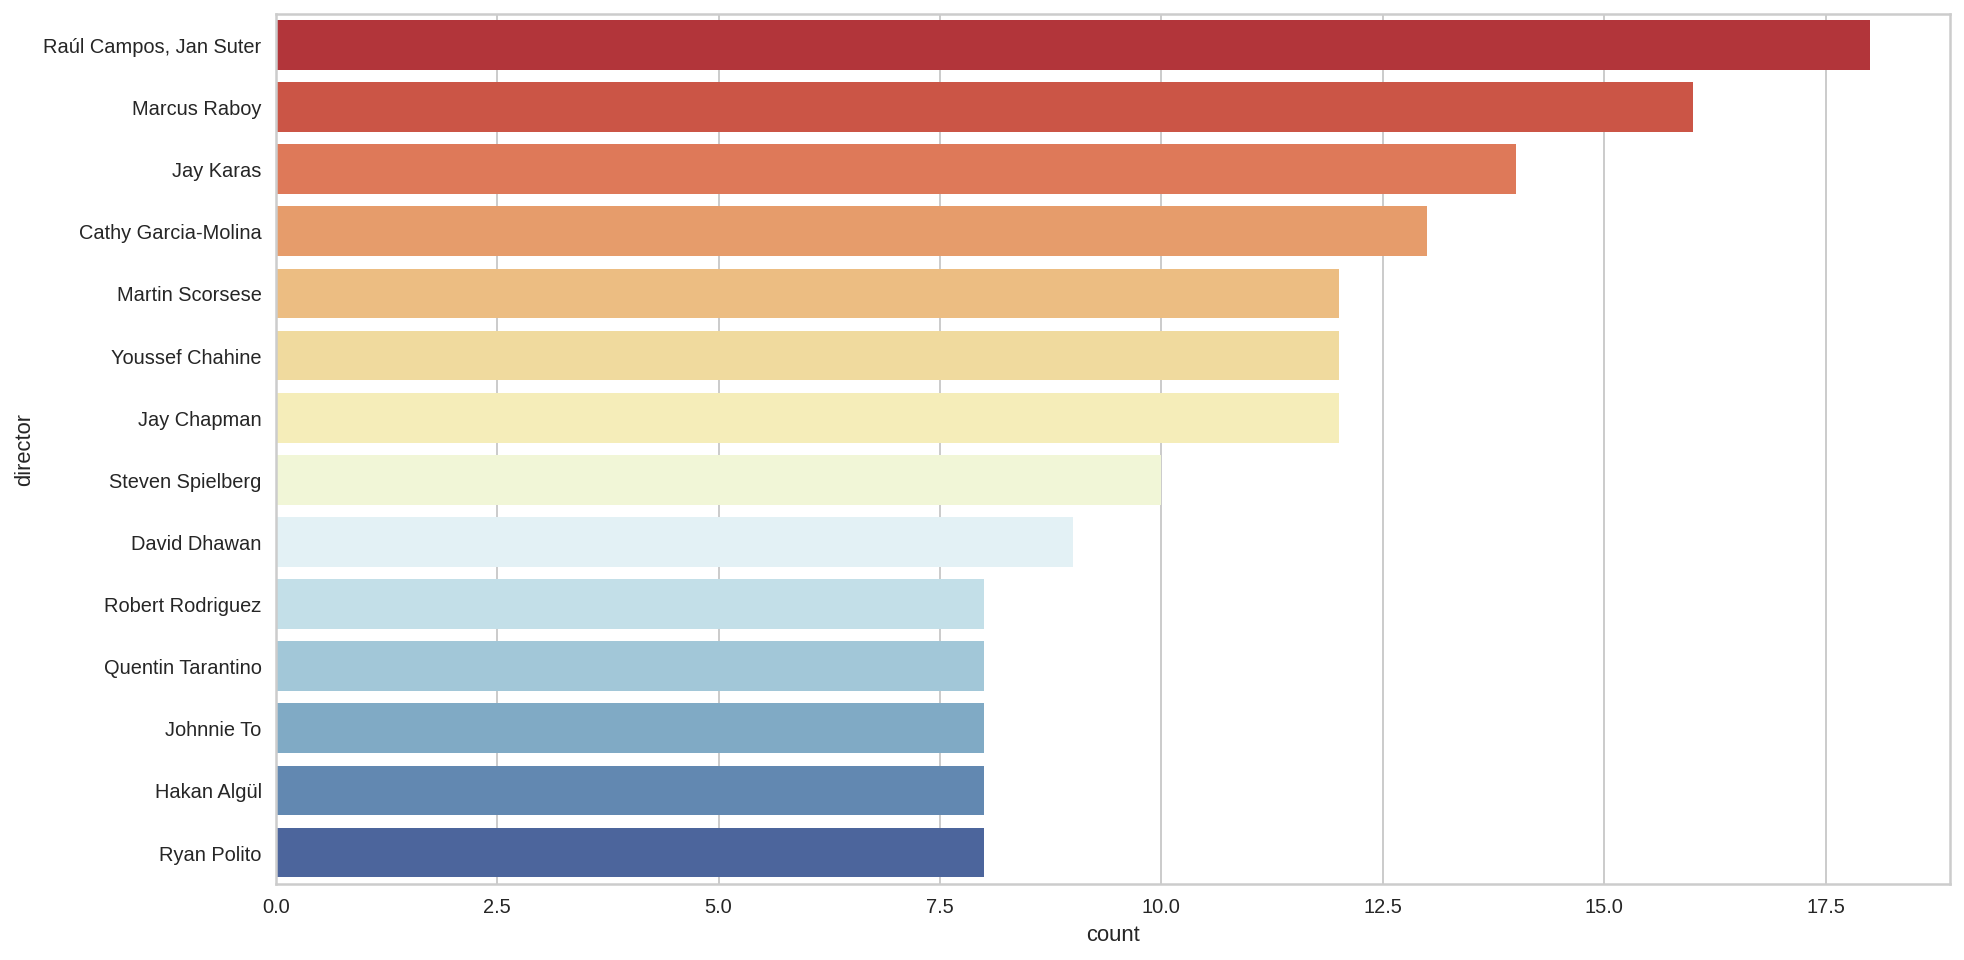

In [630]:
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['director'], data = Net_df , palette="RdYlBu", order=Net_df['director'].value_counts().index[1:15] )

# **COUNTRY**

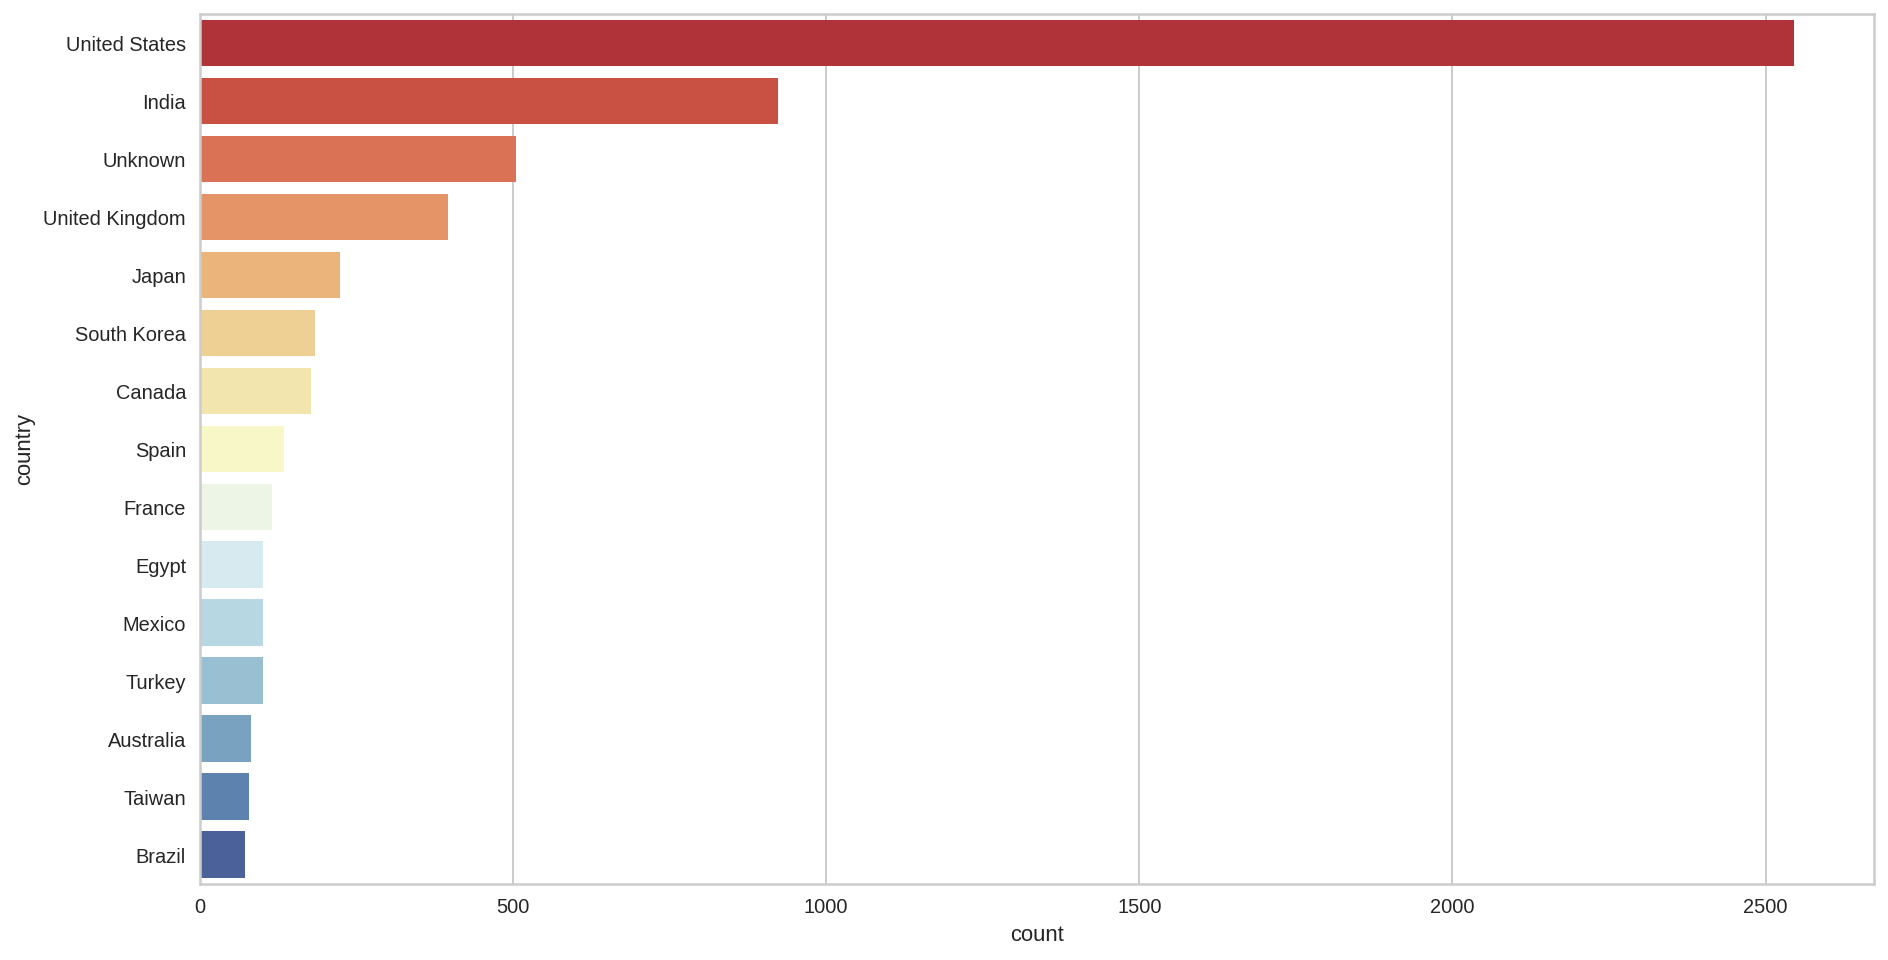

In [631]:
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['country'], data = Net_df , palette="RdYlBu", order=Net_df['country'].value_counts().index[0:15] )

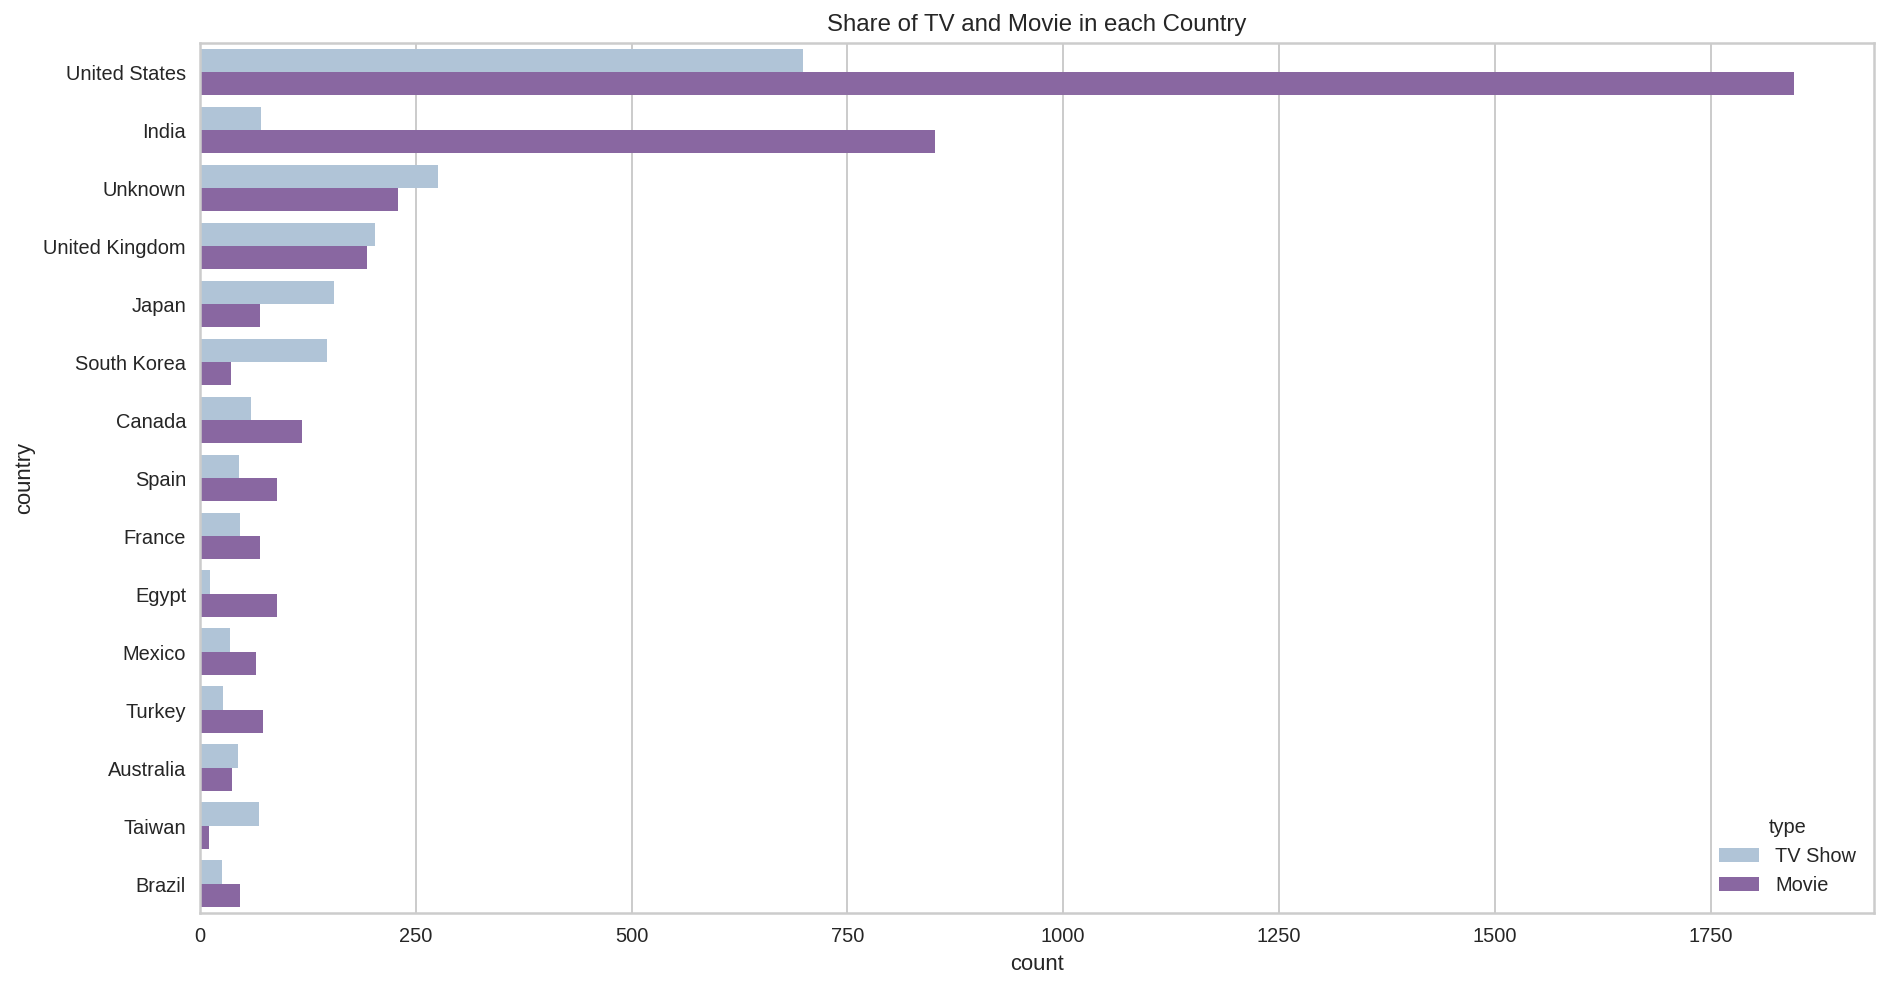

In [632]:
plt.figure(figsize=(15,8))
sns.countplot(y=Net_df['country'],palette="BuPu",order=Net_df['country'].value_counts().index[0:15],hue=Net_df['type'])
plt.title("Share of TV and Movie in each Country")
plt.show()

# **RATING**

In [633]:
Net_df["rating"].nunique()

14

In [634]:
Net_df["rating"].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [635]:
rename_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

Net_df['rating'] = Net_df['rating'].replace(to_replace = rename_rating)
Net_df['rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

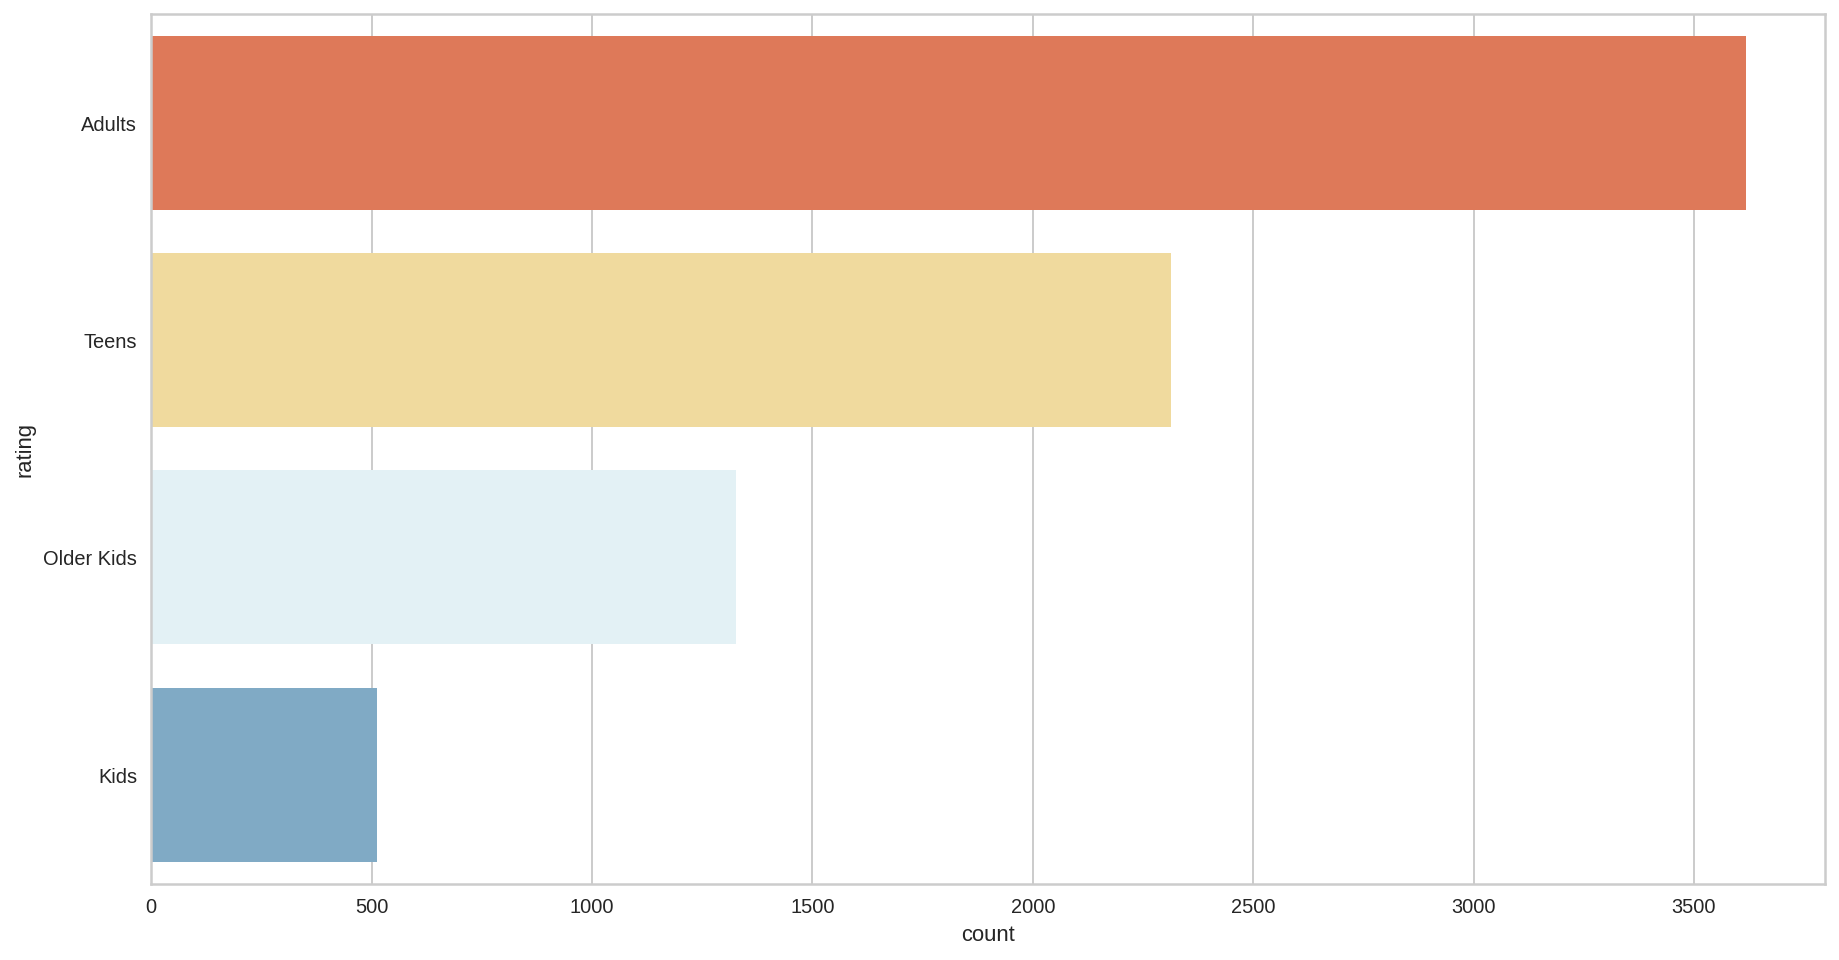

In [636]:
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['rating'], data = Net_df , palette="RdYlBu", )

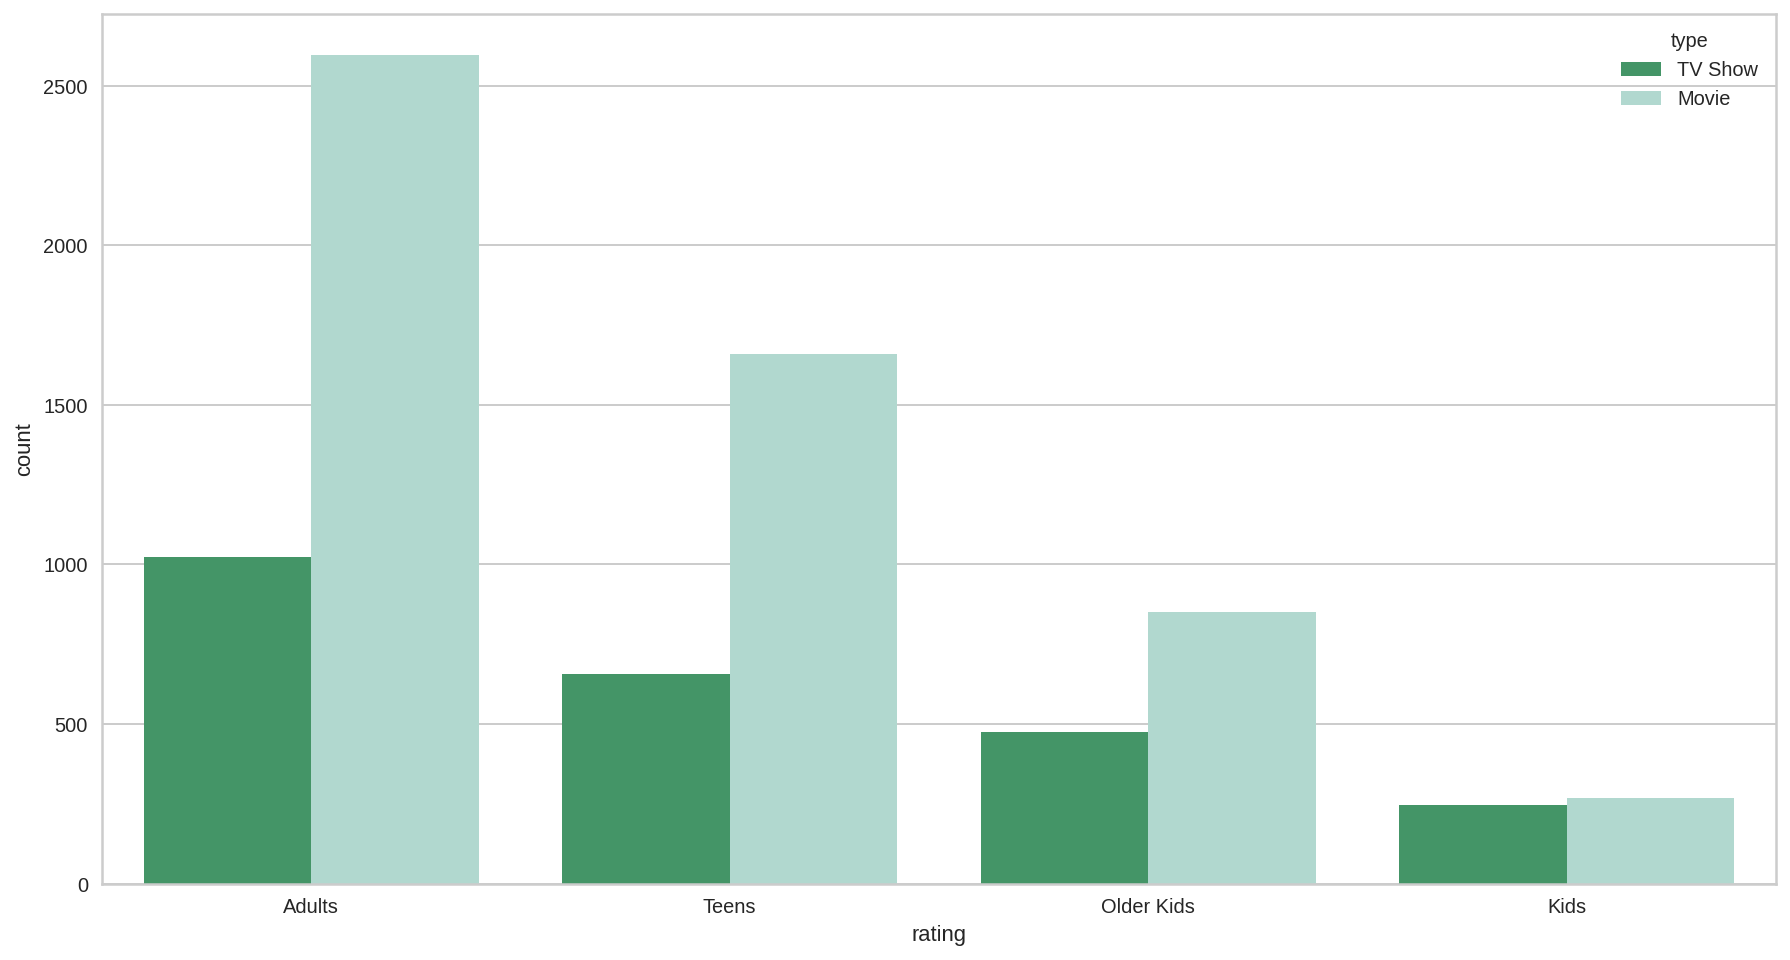

In [637]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = Net_df , x = Net_df['rating'],palette = 'BuGn_r', hue = Net_df['type'],)

# **year_added**

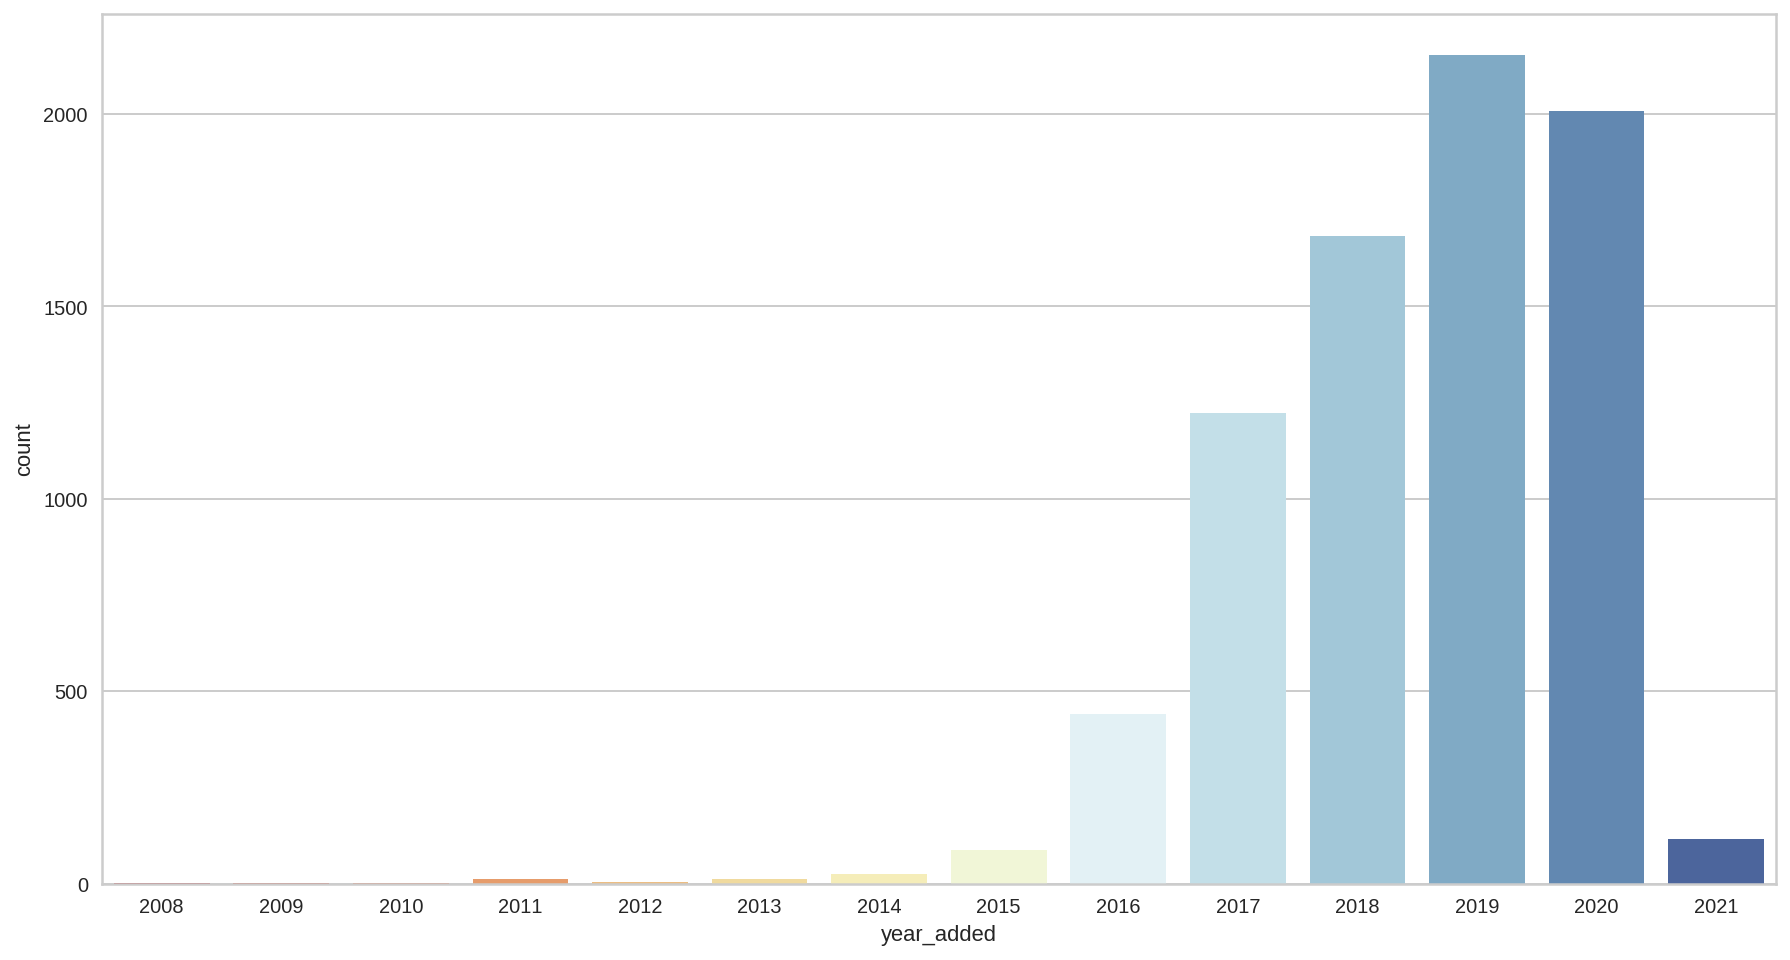

In [638]:
plt.figure(figsize=(15,8))
sns.countplot(x =Net_df['year_added'], data = Net_df , palette="RdYlBu", )

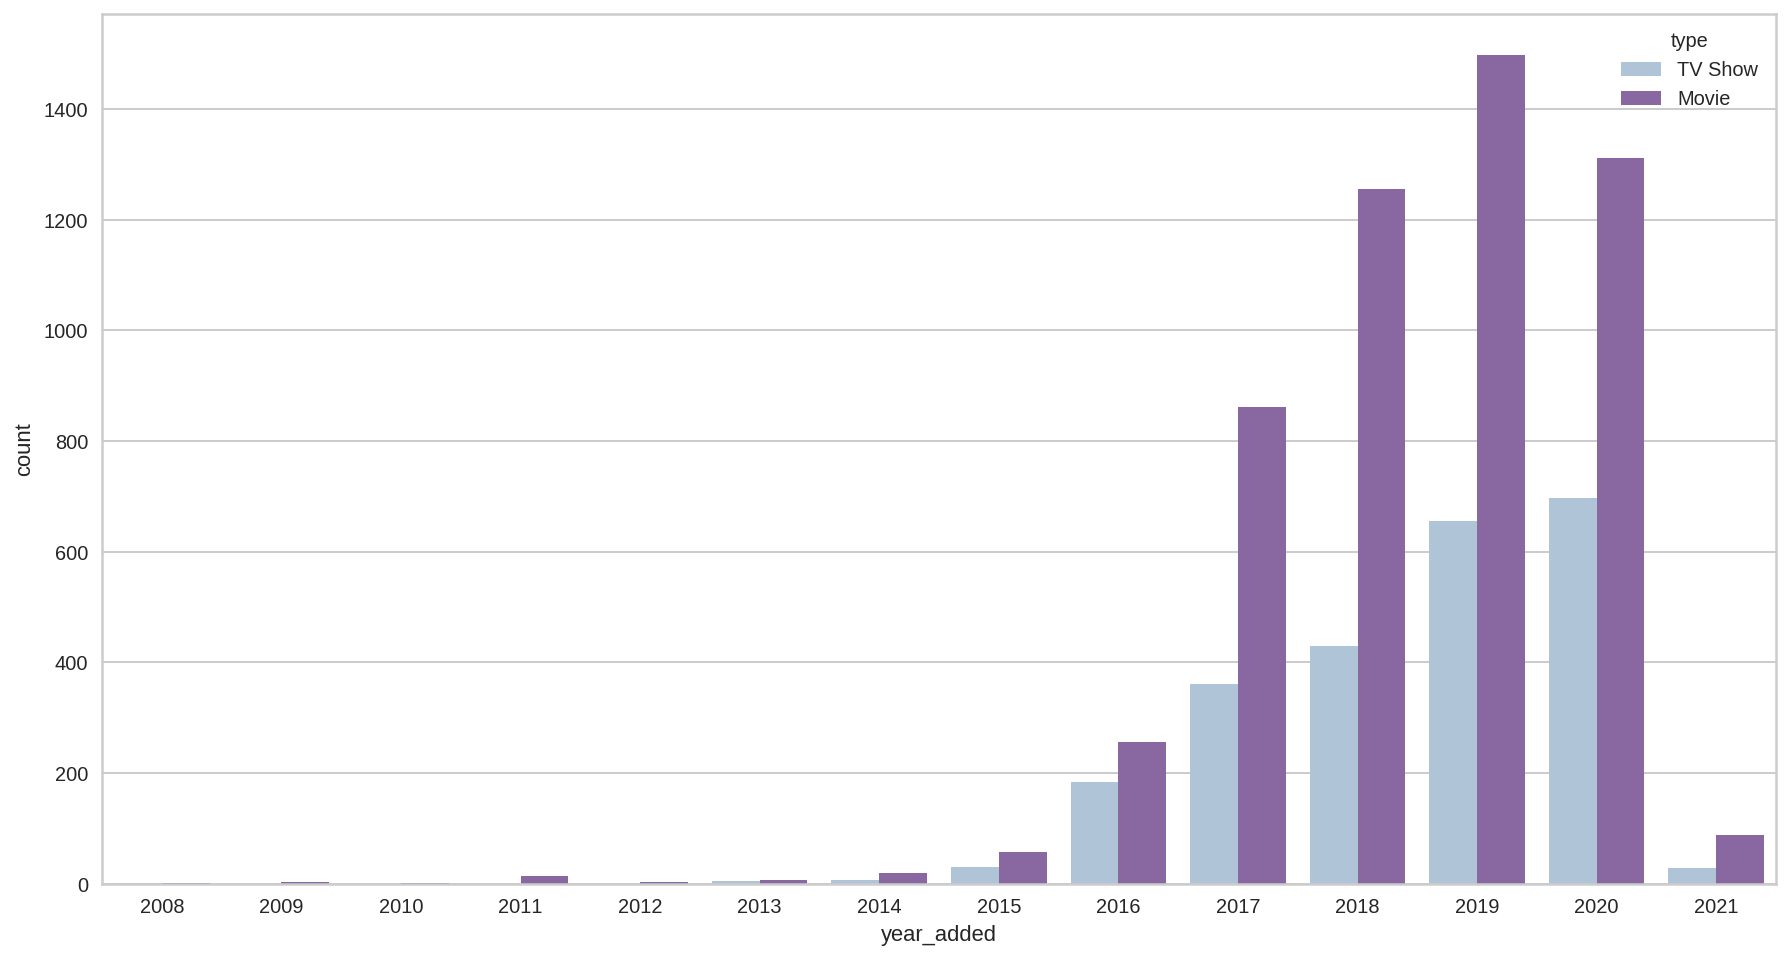

In [639]:
plt.figure(figsize=(15,8))
sns.countplot(x=Net_df['year_added'],palette="BuPu",hue=Net_df['type'])

# **month_added**

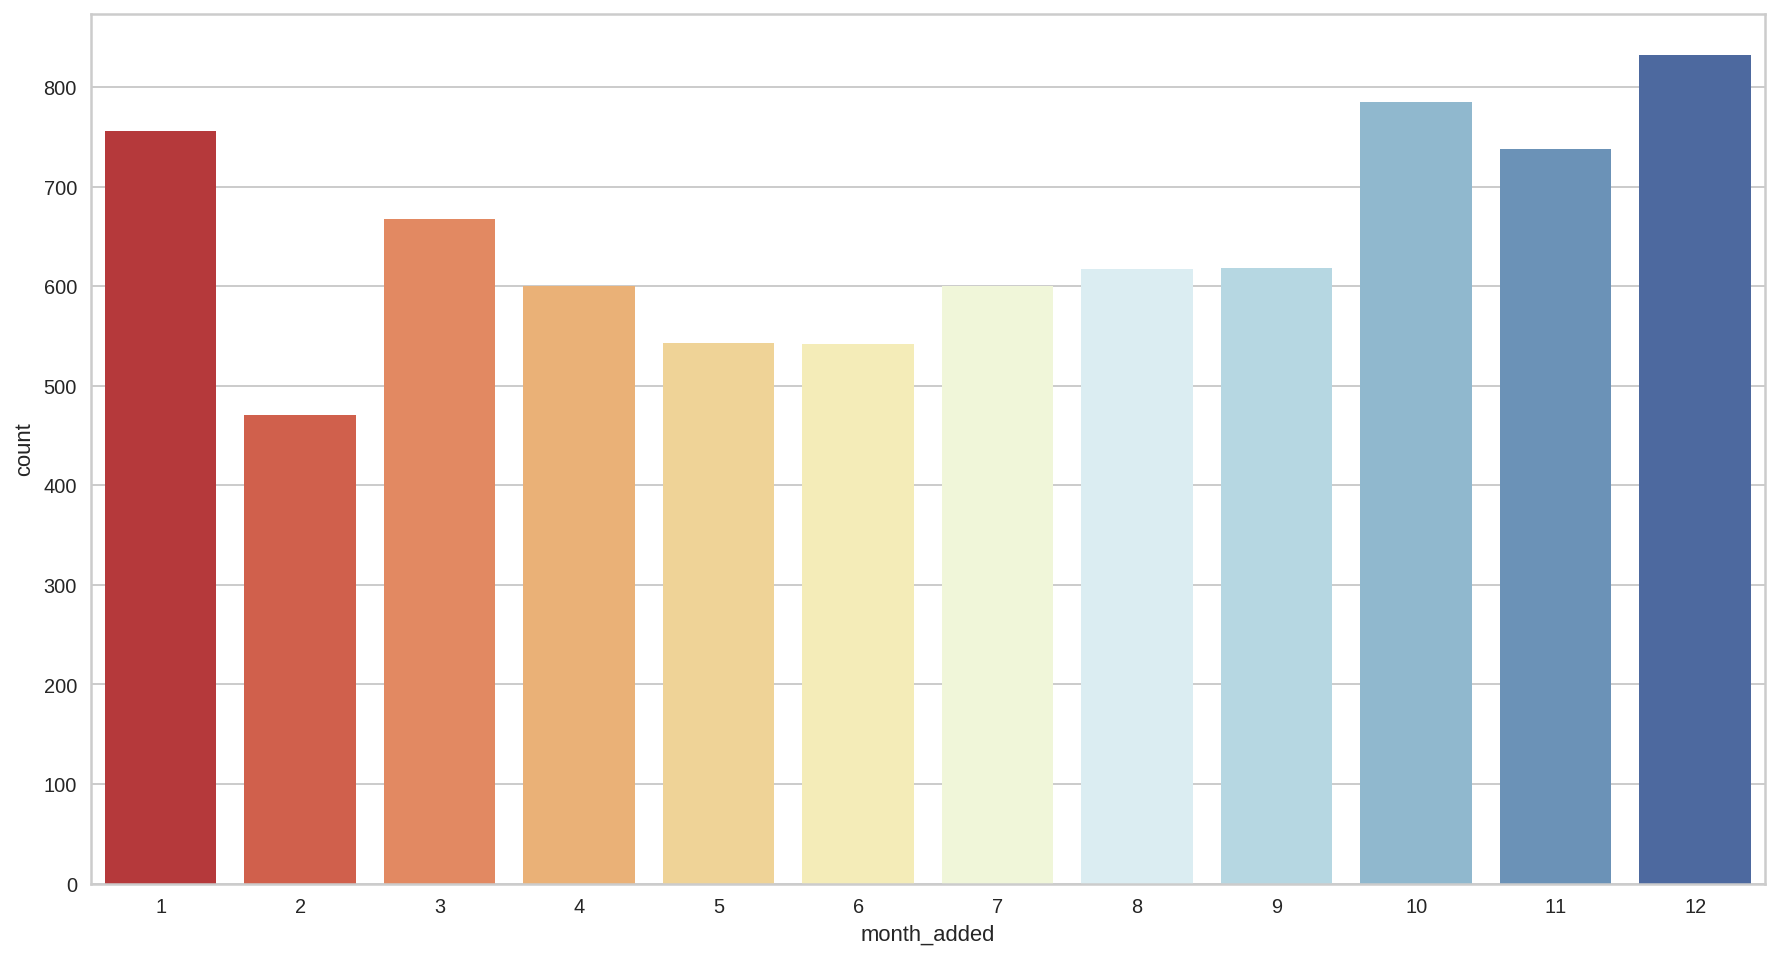

In [640]:
plt.figure(figsize=(15,8))
sns.countplot(x =Net_df['month_added'], data = Net_df , palette="RdYlBu", )

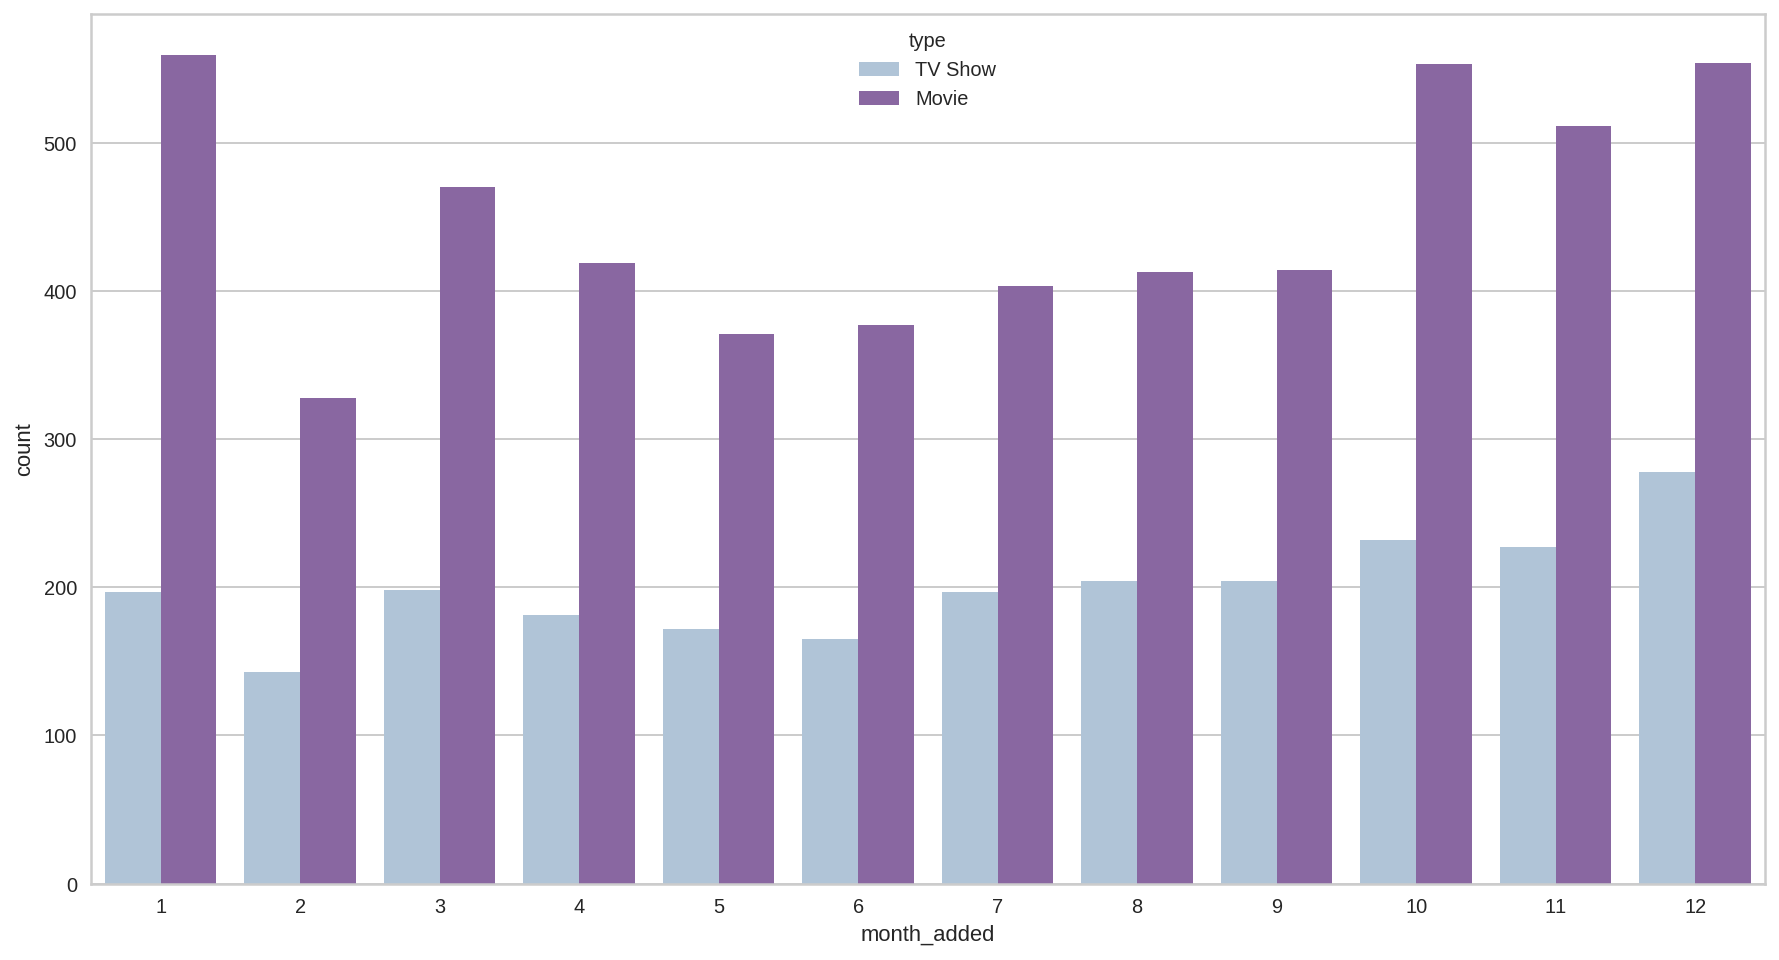

In [641]:
plt.figure(figsize=(15,8))
sns.countplot(x=Net_df['month_added'],palette="BuPu",hue=Net_df['type'])

# **DURATION**

### **Movie Duration**

In [642]:
movie_dur = Net_df.loc[Net_df['type'] == 'Movie',['type','duration']]  
movie_dur['duration'] = movie_dur['duration'].apply(lambda x : int(x.split()[0]))

Text(0.5, 1.0, 'Movie Duration')

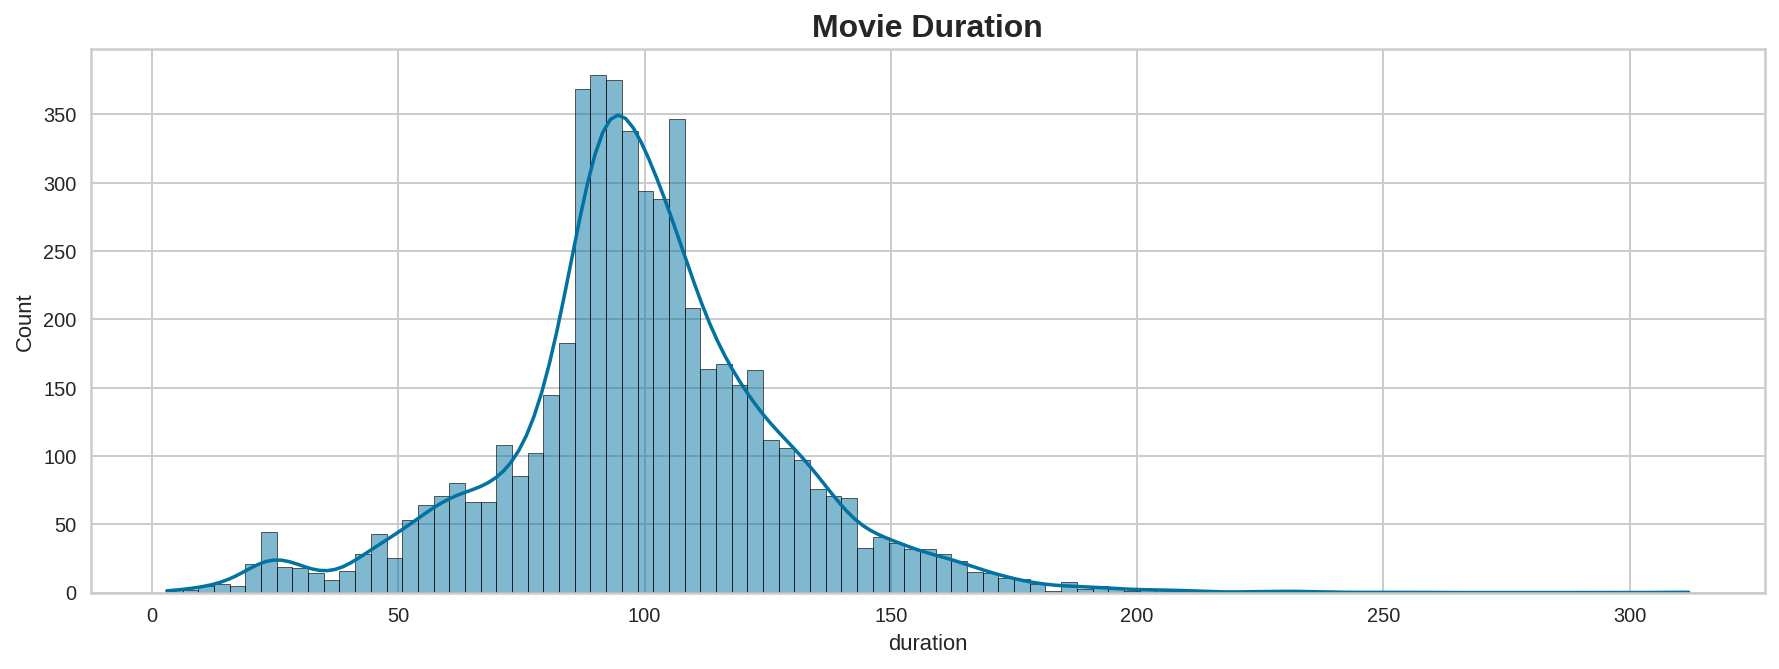

In [643]:
#movie lenth distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(x='duration',data=movie_dur,kde=True,)
plt.title("Movie Duration",size='16',fontweight="bold")

### **TV Show Duration**

In [644]:
Net_df.duration[Net_df['type'] == 'TV Show'].value_counts()

1 Season      1606
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
11 Seasons       2
12 Seasons       2
15 Seasons       2
13 Seasons       1
16 Seasons       1
Name: duration, dtype: int64

In [645]:
TV_Show_dur = Net_df.loc[Net_df['type'] == 'TV Show',['type','duration']]

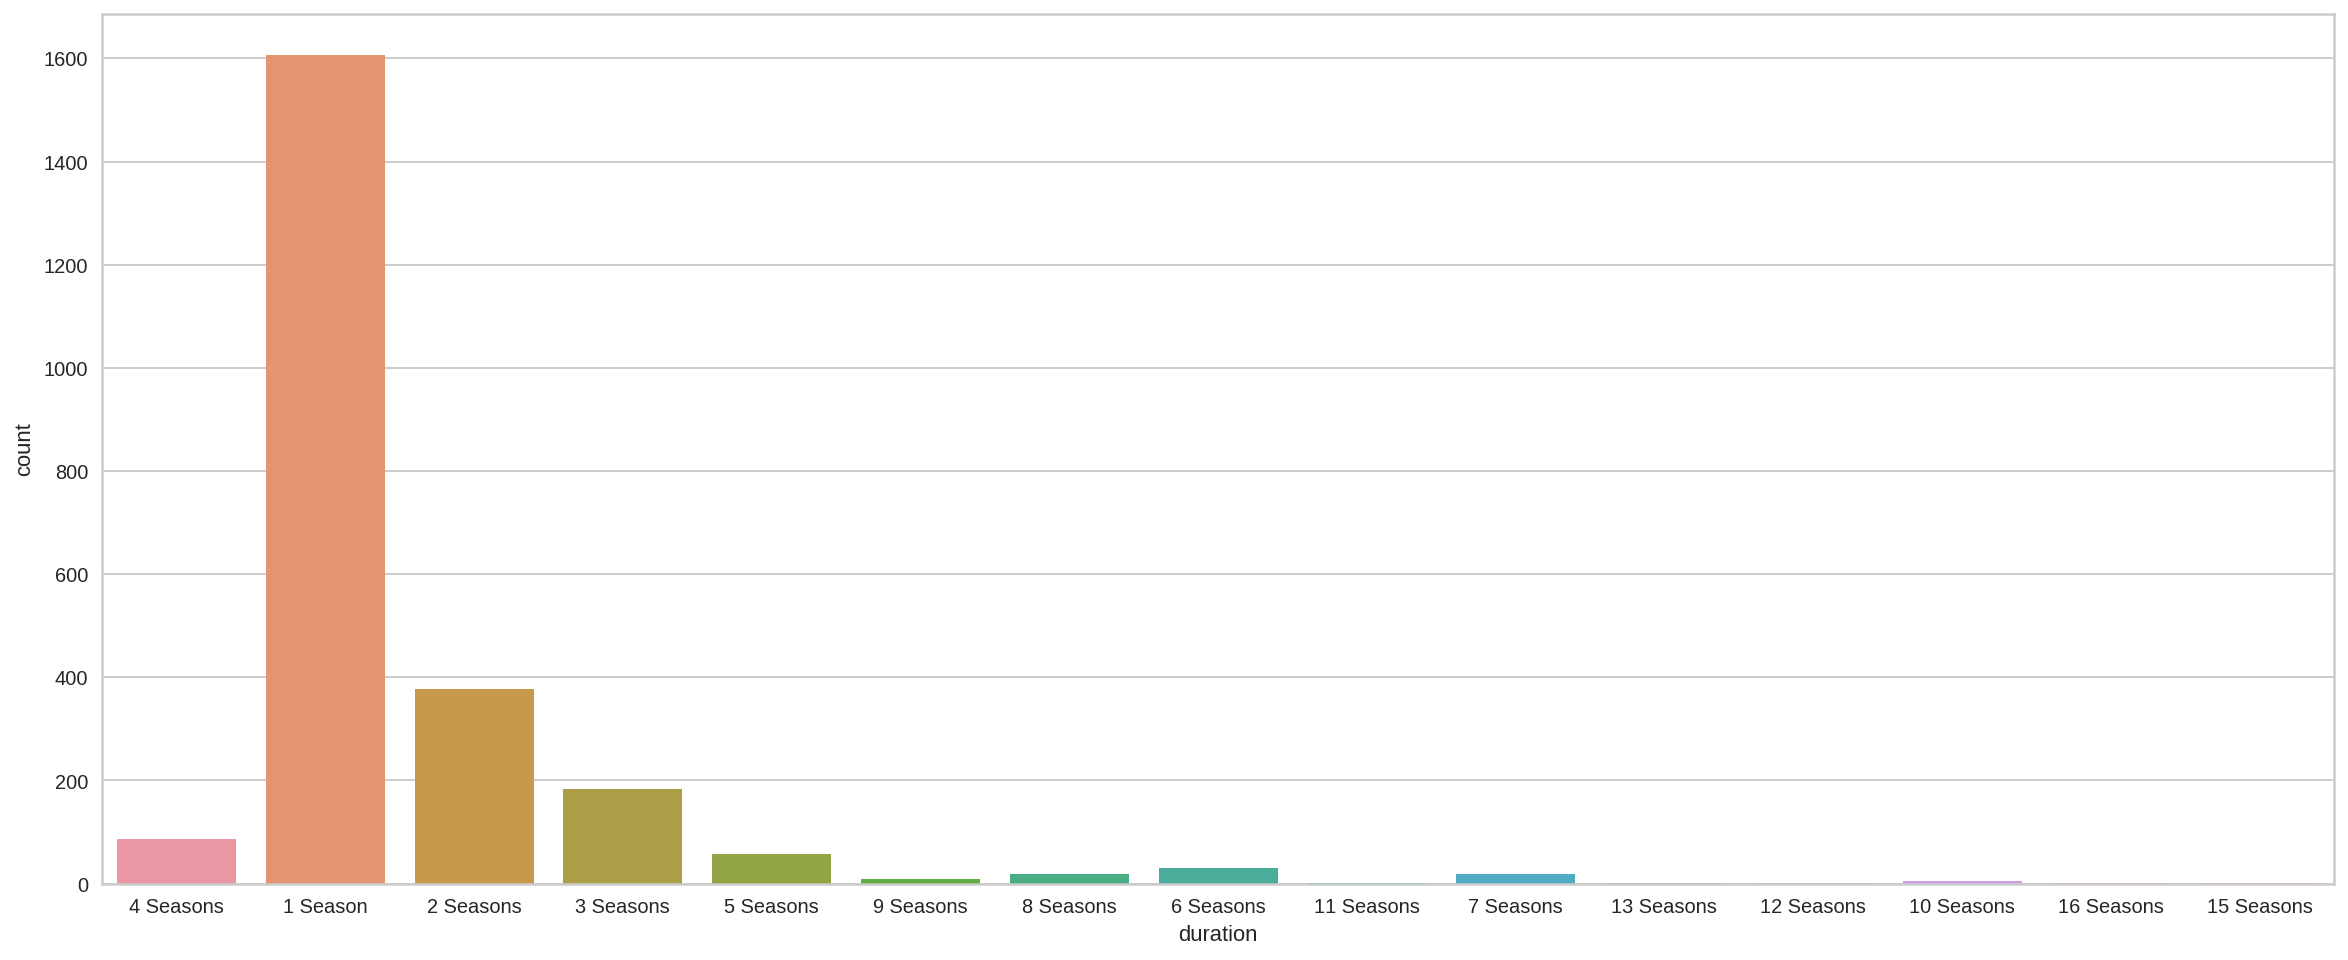

In [646]:
plt.figure(figsize=(20,8))
sns.countplot(x=TV_Show_dur['duration'])

# **Genres**

In [647]:
Net_df['genres'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: genres, Length: 491, dtype: int64

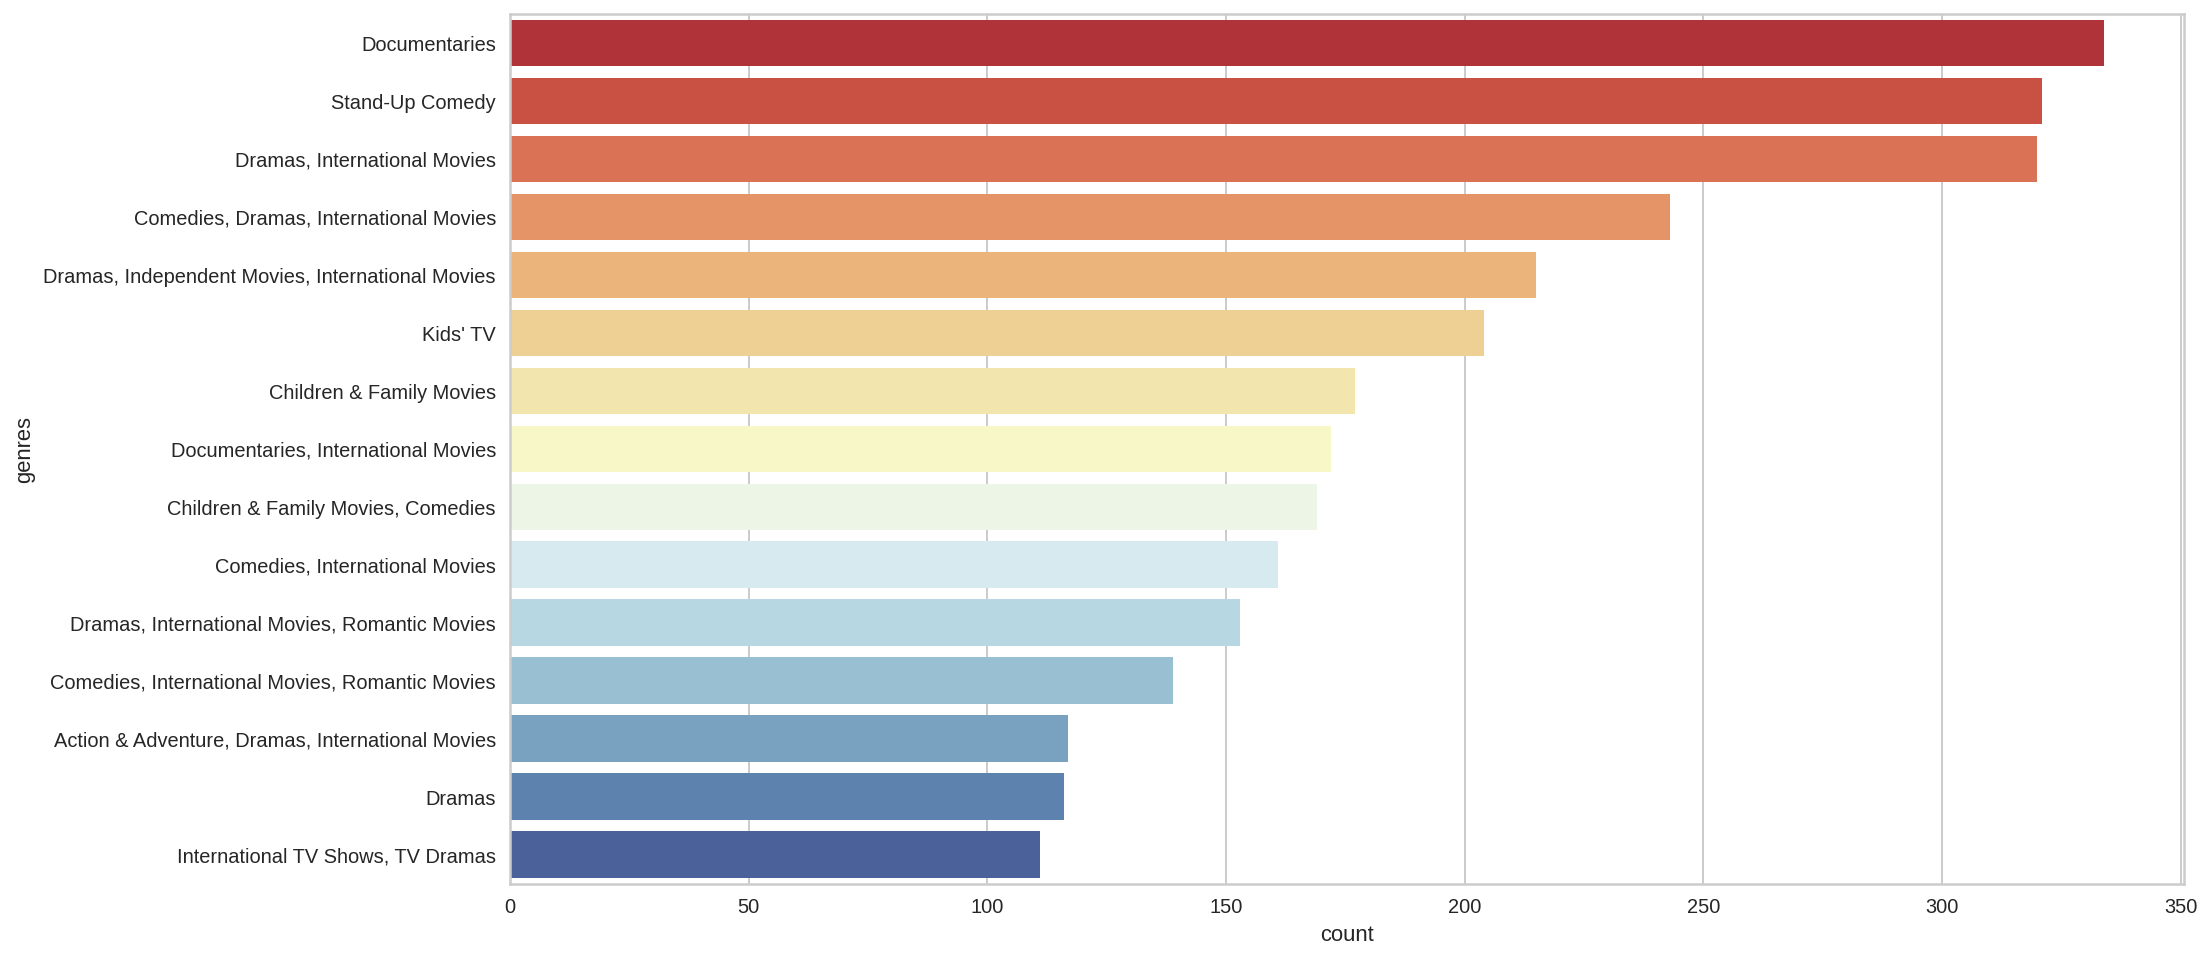

In [648]:
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['genres'], data = Net_df , palette="RdYlBu", order=Net_df['genres'].value_counts().index[0:15] )

In [649]:
genres_df = Net_df.copy()

In [650]:
genres_df['genres'] = genres_df['genres'].apply(lambda x : x.split(','))             #splitting into list

In [651]:

list_genre = []
for i in genres_df['genres']:
  list_genre +=i                                                                     

for i in range(len(list_genre)): 
  list_genre[i] = list_genre[i].strip()

genres_dict = {}
for genre in  list_genre:
  if genre in genres_dict:
    genres_dict[genre] +=1
  else:
    genres_dict[genre] = 1

genres_dict = dict(sorted(genres_dict.items(), key=lambda item: item[1],reverse=True))

In [652]:
print(genres_dict)

{'International Movies': 2437, 'Dramas': 2105, 'Comedies': 1471, 'International TV Shows': 1197, 'Documentaries': 786, 'Action & Adventure': 721, 'TV Dramas': 703, 'Independent Movies': 673, 'Children & Family Movies': 532, 'Romantic Movies': 531, 'TV Comedies': 517, 'Thrillers': 491, 'Crime TV Shows': 426, "Kids' TV": 411, 'Docuseries': 352, 'Romantic TV Shows': 333, 'Stand-Up Comedy': 329, 'Music & Musicals': 321, 'Horror Movies': 312, 'British TV Shows': 231, 'Reality TV': 222, 'Sci-Fi & Fantasy': 218, 'Sports Movies': 196, 'Korean TV Shows': 150, 'TV Action & Adventure': 149, 'Anime Series': 146, 'Spanish-Language TV Shows': 146, 'Classic Movies': 103, 'TV Mysteries': 90, 'LGBTQ Movies': 90, 'Science & Nature TV': 85, 'TV Sci-Fi & Fantasy': 75, 'TV Horror': 69, 'Teen TV Shows': 60, 'Cult Movies': 59, 'Faith & Spirituality': 57, 'Anime Features': 57, 'Movies': 52, 'Stand-Up Comedy & Talk Shows': 52, 'TV Thrillers': 50, 'Classic & Cult TV': 25, 'TV Shows': 12}


In [653]:
#new = pd.DataFrame.from_dict(genres_dict,columns=['genres', 'count'])
df = pd.DataFrame(list(genres_dict.items()), columns = ['Name','Value'])

In [654]:
print(df)

                            Name  Value
0           International Movies   2437
1                         Dramas   2105
2                       Comedies   1471
3         International TV Shows   1197
4                  Documentaries    786
5             Action & Adventure    721
6                      TV Dramas    703
7             Independent Movies    673
8       Children & Family Movies    532
9                Romantic Movies    531
10                   TV Comedies    517
11                     Thrillers    491
12                Crime TV Shows    426
13                      Kids' TV    411
14                    Docuseries    352
15             Romantic TV Shows    333
16               Stand-Up Comedy    329
17              Music & Musicals    321
18                 Horror Movies    312
19              British TV Shows    231
20                    Reality TV    222
21              Sci-Fi & Fantasy    218
22                 Sports Movies    196
23               Korean TV Shows    150


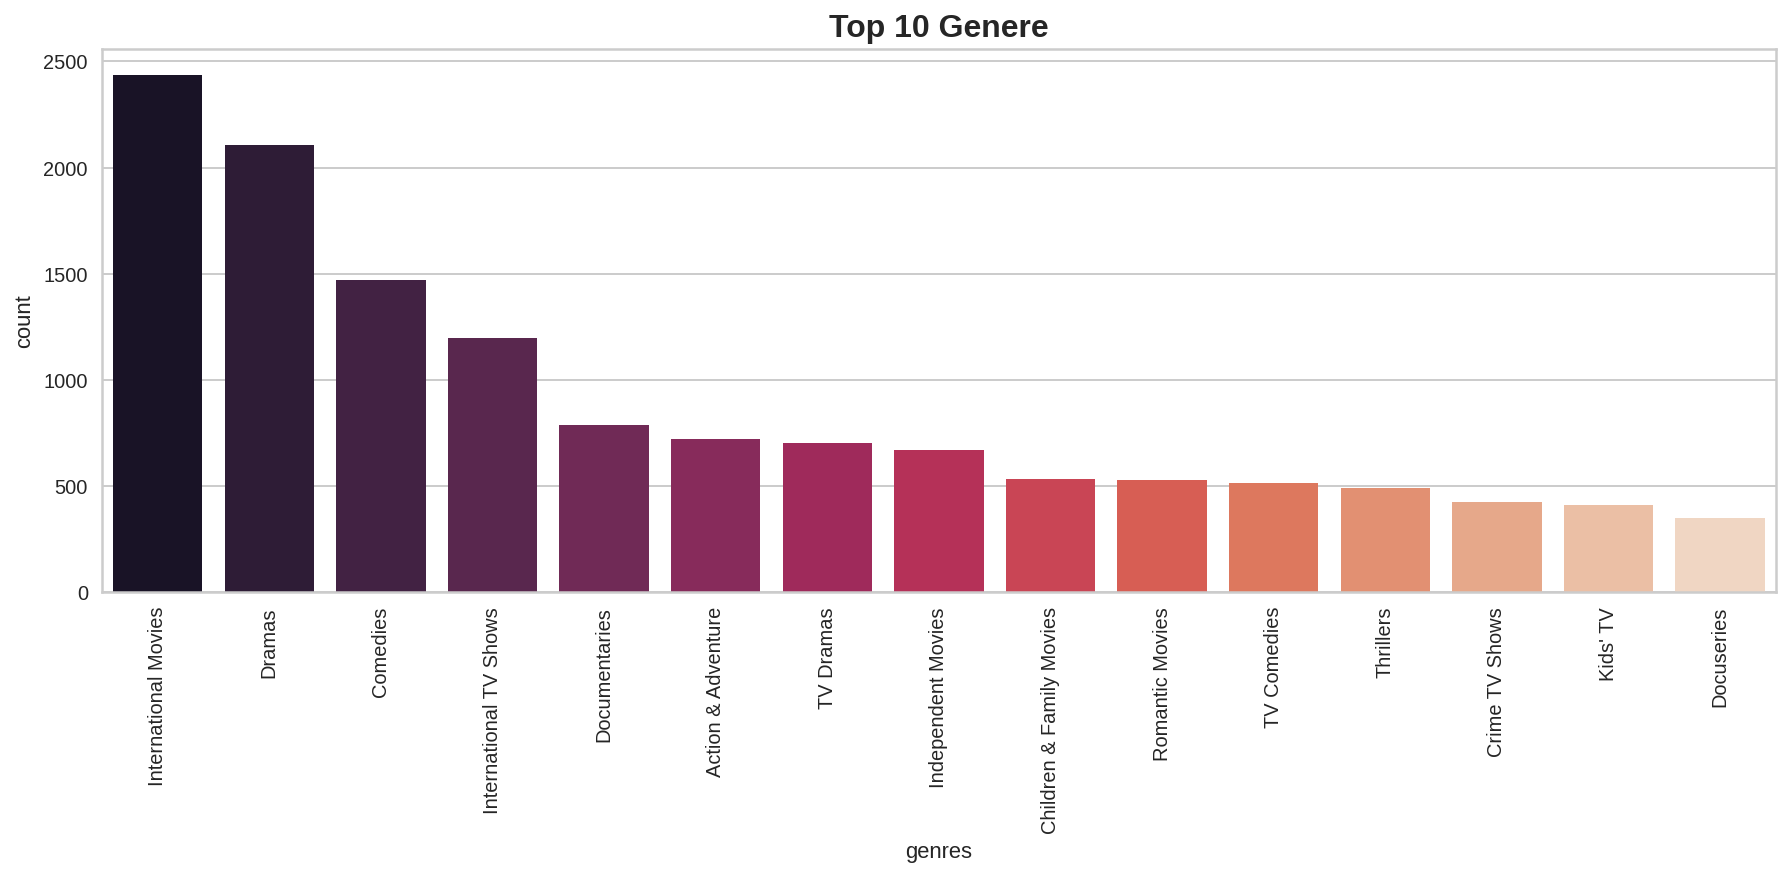

In [655]:
#Top 15 genres on netflix
df_genre_count = pd.DataFrame(genres_dict.values(),genres_dict.keys()).reset_index().rename(columns={'index':'genres', 0:'count'})[0:15]
plt.figure(figsize=(15,5))
sns.barplot(x='genres',y='count',data=df_genre_count,palette="rocket")
plt.title("Top 10 Genere",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

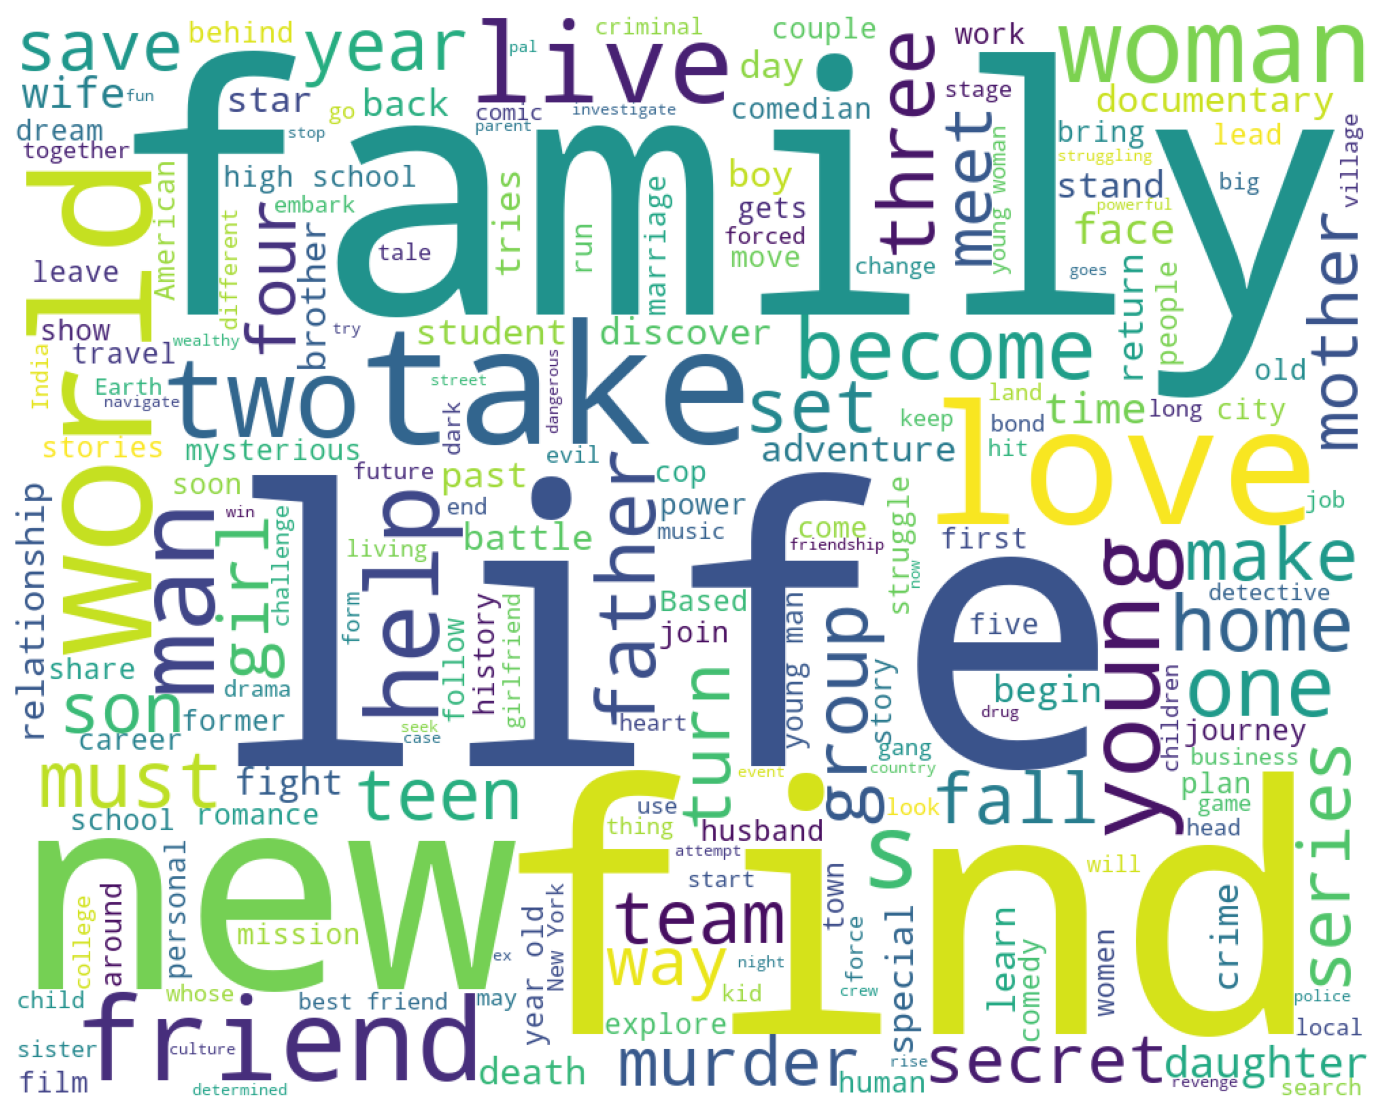

In [656]:
#Most occurred word in title
plt.subplots(figsize=(20,10))
text=" ".join(Net_df.description)
wordcloud = WordCloud(background_color='white',width=1000,height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Understanding what type content is available in different countries**

In [657]:
Net_df.country = Net_df.country.str.split(',')
Net_df.loc[:, 'country'] = Net_df.country.map(lambda x: x[0])

In [658]:
Net_df['country'].nunique()

82

In [659]:
Net_df['country'].value_counts()

United States     2874
India              956
United Kingdom     576
Unknown            505
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

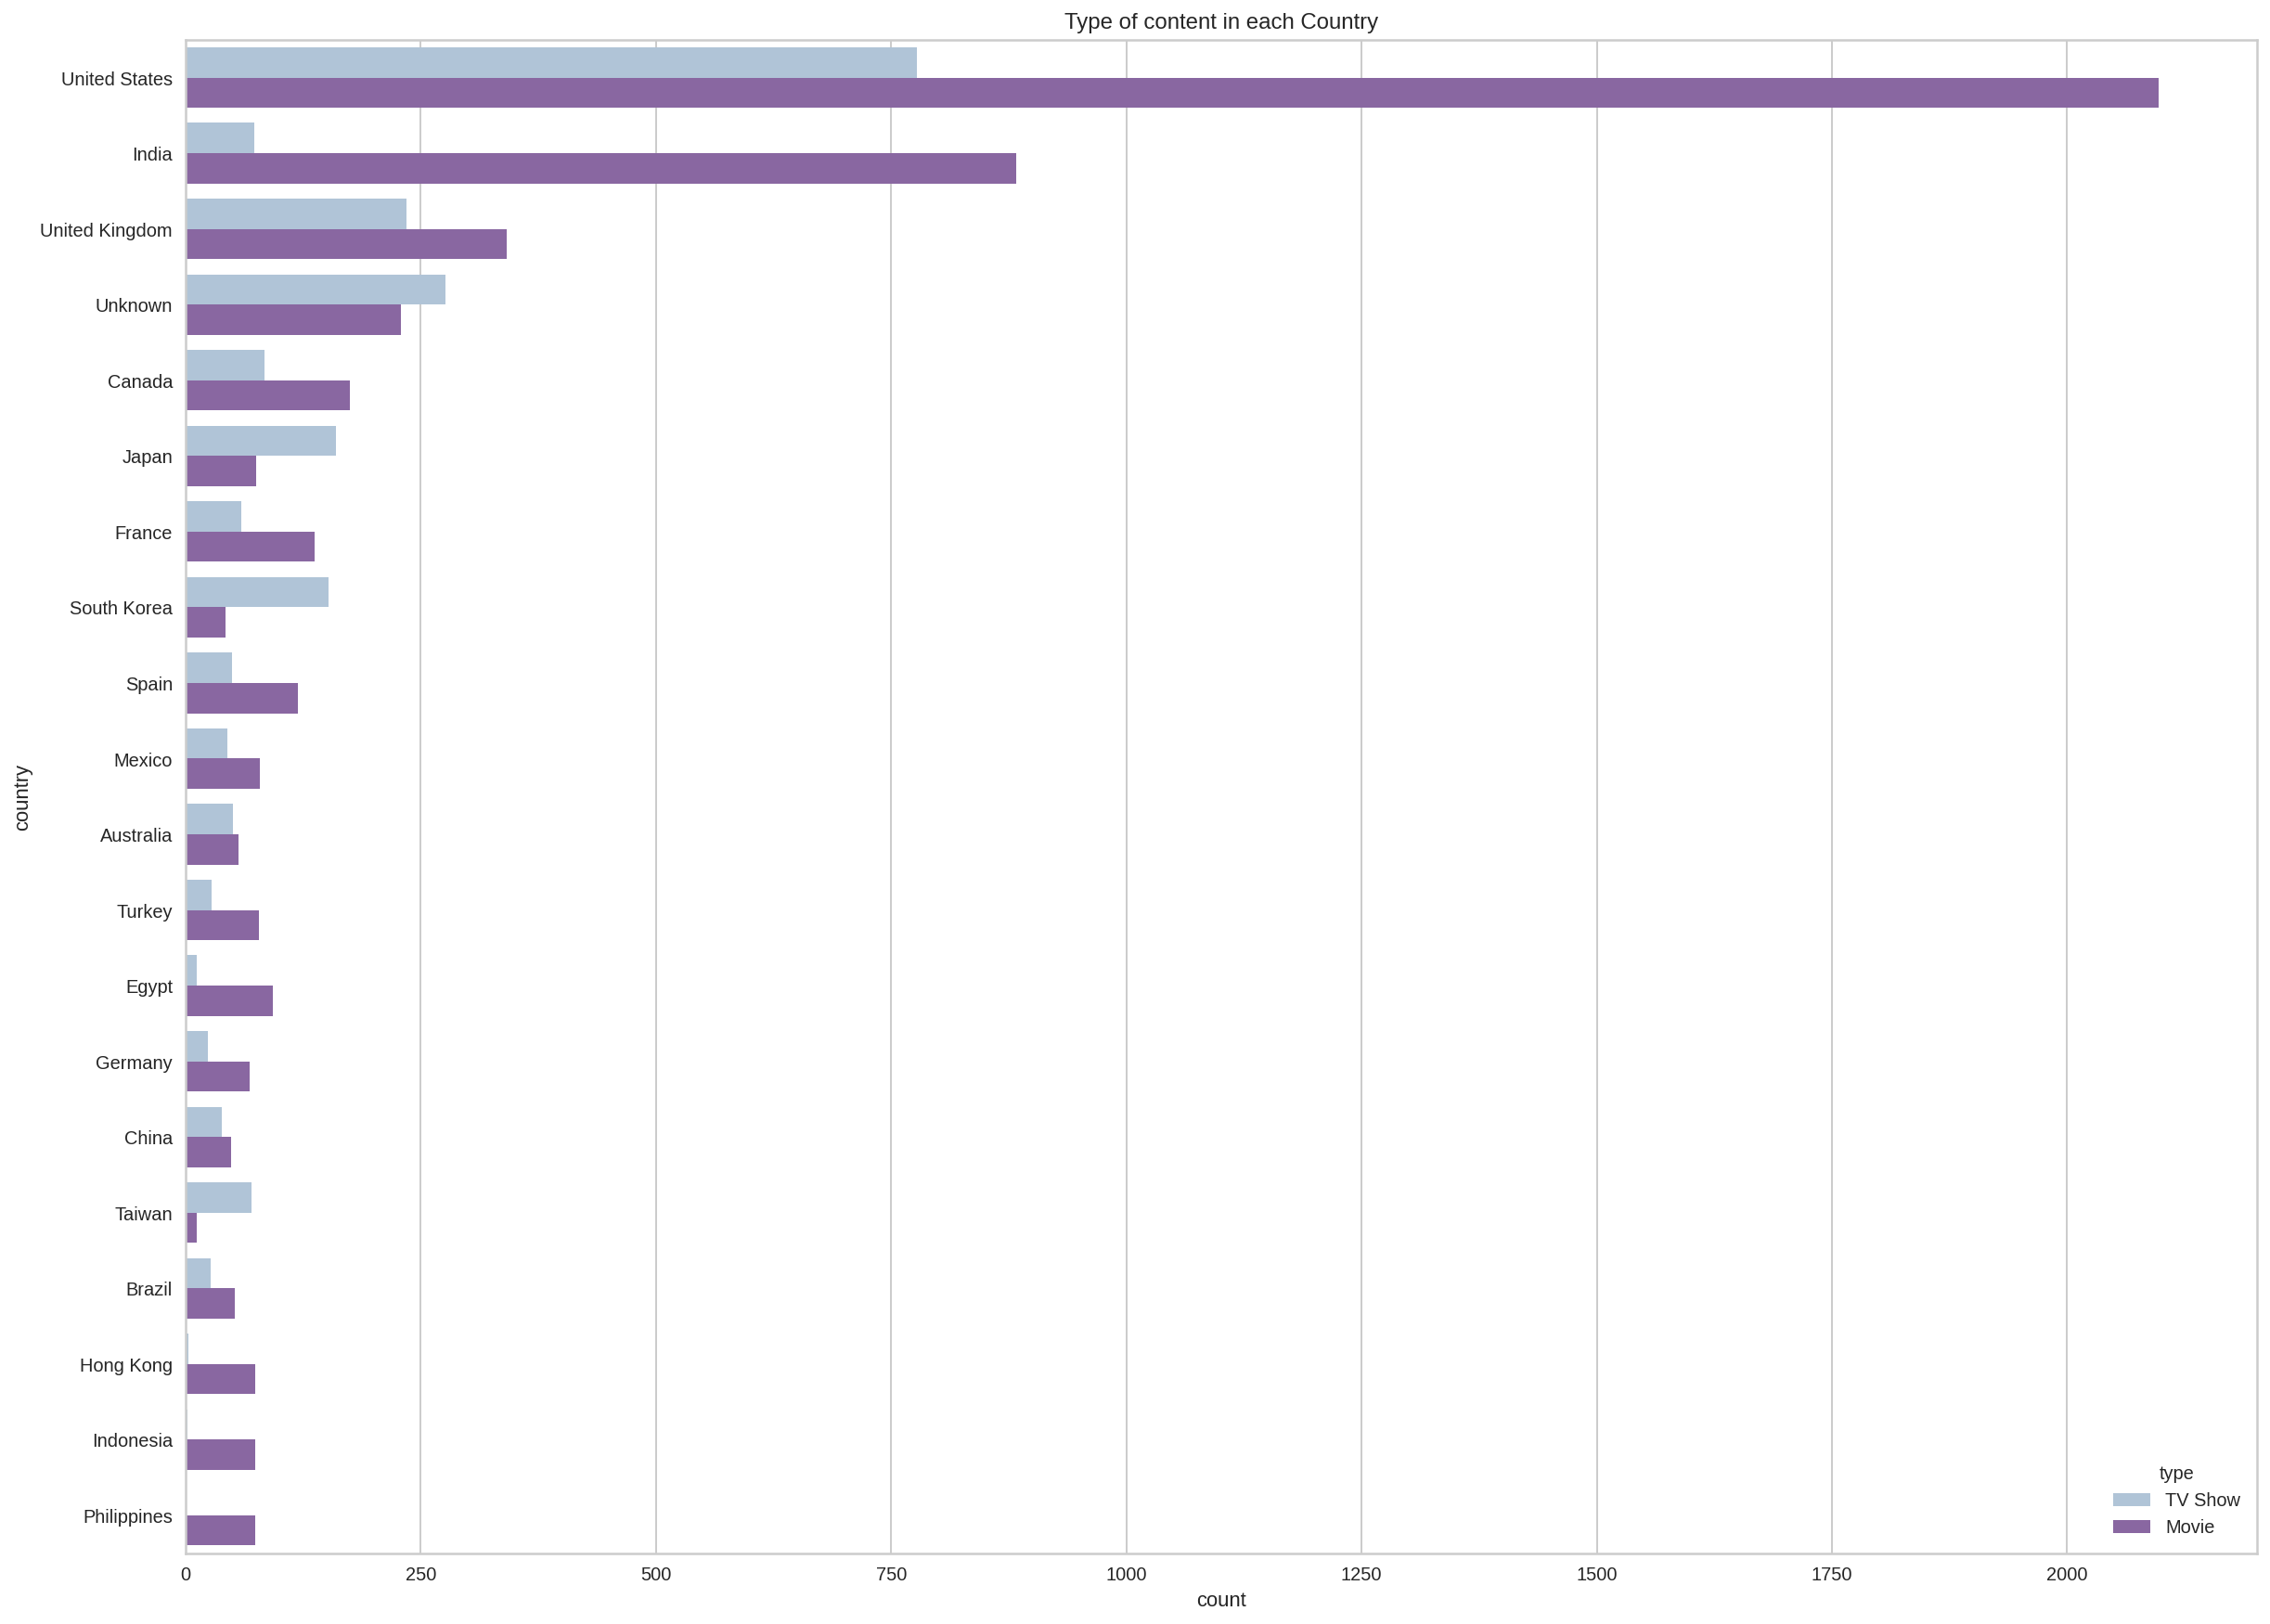

In [660]:
plt.figure(figsize=(20,15))
sns.countplot(y=Net_df['country'],palette="BuPu",order=Net_df['country'].value_counts().index[0:20],hue=Net_df['type'])
plt.title("Type of content in each Country")
plt.show()

# **Is Netflix has increasingly focusing on TV rather than movies in recent years ?**

In [661]:
#Net_add_df=Net_df.groupby(['type','year_added'])

In [662]:
new_df = Net_df[['type','year_added']].copy()

In [663]:
print(new_df)

         type  year_added
0     TV Show        2020
1       Movie        2016
2       Movie        2018
3       Movie        2017
4       Movie        2020
...       ...         ...
7782    Movie        2020
7783    Movie        2019
7784    Movie        2020
7785  TV Show        2020
7786    Movie        2020

[7770 rows x 2 columns]


Text(0.5, 1.0, 'Movies and TV Shows added over time')

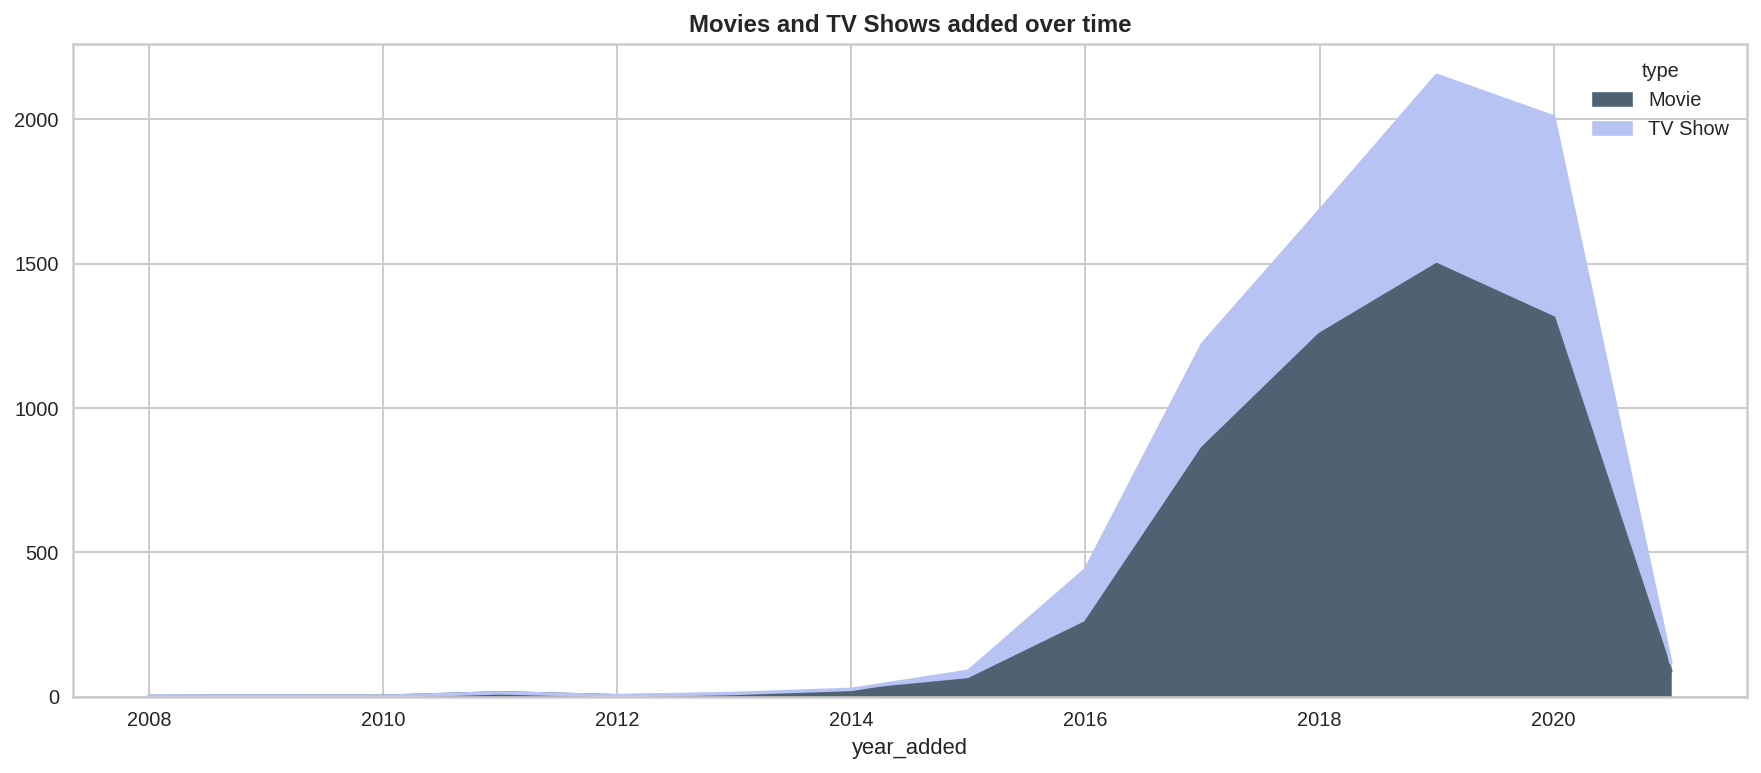

In [664]:
pd.crosstab(new_df.year_added, new_df.type).plot(kind='area',figsize=(15,6),color = ['#4F6272', '#B7C3F3'])
plt.title("Movies and TV Shows added over time",weight="bold")

# **Clustering similar content by matching text-based features**

In [665]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


In [666]:
import nltk 
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [667]:
# combining textual columns

Net_df['combined_text'] = Net_df['description']+Net_df['genres']+Net_df['title']

In [668]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [669]:
Net_df['combined_text'] = Net_df['combined_text'].apply(remove_punctuation)
Net_df['combined_text'].head(10)

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead his fellow ...
3    In a postapocalyptic world ragdoll robots hide...
4    A brilliant group of students become cardcount...
5    A genetics professor experiments with a treatm...
6    After an awful accident a couple admitted to a...
7    After one of his high school students attacks ...
8    When a doctor goes missing his psychiatrist wi...
9    An architect and his wife move into a castle t...
Name: combined_text, dtype: object

## **Removing stopwords**

In [670]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

## **Function to remove stopwords**

In [671]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [672]:
Net_df['combined_text'] = Net_df['combined_text'].apply(stopwords)
Net_df['combined_text'].head(10)

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
5    genetics professor experiments treatment comat...
6    awful accident couple admitted grisly hospital...
7    one high school students attacks dedicated tea...
8    doctor goes missing psychiatrist wife treats b...
9    architect wife move castle slated become luxur...
Name: combined_text, dtype: object

## **Top words before stemming**

## **Collect vocabulary count**

In [673]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(Net_df['combined_text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

### Store the vocab and counts in a pandas dataframe

In [674]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

### **Bar plot of top words before stemming**

##  **Stemming operations**

### Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon" 

**A funtion to carry out stemming operation**

In [675]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [676]:
Net_df['combined_text'] = Net_df['combined_text'].apply(stemming)
Net_df['combined_text'].head(10)

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
5    genet professor experi treatment comatos siste...
6    aw accid coupl admit grisli hospit separ must ...
7    one high school student attack dedic teacher t...
8    doctor goe miss psychiatrist wife treat bizarr...
9    architect wife move castl slate becom luxuri h...
Name: combined_text, dtype: object

## **After stemming operation**

In [680]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(Net_df['combined_text'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [681]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(Net_df['combined_text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [682]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25988,25989,25990,25991,25992,25993,25994,25995,25996,25997
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
